# Part I - Ford GoBike System Data Analysis
## by Izzat Almustafa

## Introduction

The **Ford GoBike System** Dataset contains information about rides in a bike sharing system in the greater San Franciso Bay area.

## Preliminary Wrangling

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

%config InlineBackend.figure_format='retina'

In [3]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

### Checking and Removing Rows with missing data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
df = df.dropna()

In [6]:
df.head()

duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   
5          1793  2019-02-28 23:49:58.6320  2019-03-01 00:19:51.7600   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   
5              93.0                      4th St at Mission Bay Blvd S   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   
5               37.770407              -122.391198           323.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   
5                            Broadway at Kearny             37.798014   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   
5            -122.405950     5200  Subscriber             1959.0   

  member_gender bike_share_for_all_trip  
0          Male                      No  
2          Male                      No  
3         Other                      No  
4          Male                     Yes  
5          Male                      No

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  member_ge

### What is the structure of the dataset?

It's in a CSV structure.

### What is/are the main feature(s) of interest in your dataset?

These are the main features of interest:

* `duration_sec` The duration of the bike trip in seconds                        
* `start_station_id` The id of the bike station where the trip started       
* `start_station_latitude` The beginning position's latitude
* `start_station_longitude`The beginning position's longitude
* `end_station_id` The id of the bike station where the trip ended              
* `end_station_latitude` The end position's latitude
* `end_station_longitude` The end position's longitude              
* `user_type` Shows if the rider is a subscriber or a customer             
* `member_birth_year` Shows when the rider was born      
* `member_gender` Shows the gender of the rider.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

All of the ones previously mentioned.

### Using Feature Engineering to create extra features

#### Creating a `distance` feature

Using the euclidean distance formula can be used to find distances between the start and end points of a bike trip, but it will return the distance in a value of coordinates, not really semantically useful but can generate useful analysis.

In [9]:
def Euclidean_Dist(df1, df2, cols=['x_coord','y_coord']):
    return np.linalg.norm(df1[cols].values - df2[cols].values,
                   axis=1)

In [10]:
df['distance'] = np.nan

In [11]:
df['distance'] = np.sqrt(np.square(df['start_station_longitude'] - df['end_station_longitude']) + np.square(df['start_station_latitude'] - df['end_station_latitude']))


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174952 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  member_ge

In [13]:
df['distance'].max()

0.6993993230710549

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174952 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  member_ge

Using the Haversine formula, the distance between two cooridnate points can be calculated in kilometers or miles (in this case it will be kilometers). 
More information about the haversine formula can be found [here](https://en.wikipedia.org/wiki/Haversine_formula)



The haversine formula distances will be the distanecs used for the analysis.

In [15]:
from math import cos, asin, sqrt, pi

def distance_calc(lat1, lon1, lat2, lon2):
    r = 6371 # km, 3958.756 for miles
    p = pi / 180

    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p) * cos(lat2*p) * (1-cos((lon2-lon1)*p))/2
    return 2 * r * asin(sqrt(a))

In [16]:
distance_calc_generator = np.vectorize(distance_calc)

In [17]:
df['distance'] =  distance_calc_generator(df['start_station_latitude'].values, 
                                                  df['start_station_longitude'].values, 
                                                  df['end_station_latitude'].values, 
                                                  df['end_station_longitude'].values)

In [18]:
df['distance']

0         0.544709
2         2.704545
3         0.260739
4         2.409301
5         3.332203
            ...   
183407    1.464766
183408    1.402716
183409    0.379066
183410    0.747282
183411    0.710395
Name: distance, Length: 174952, dtype: float64

#### Creating `age` feature

In [19]:
df['age'] = (2024 - df['member_birth_year']).astype(int)

In [20]:
df.head()

duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   
5          1793  2019-02-28 23:49:58.6320  2019-03-01 00:19:51.7600   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   
5              93.0                      4th St at Mission Bay Blvd S   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   
5               37.770407              -122.391198           323.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   
5                            Broadway at Kearny             37.798014   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   
5            -122.405950     5200  Subscriber             1959.0   

  member_gender bike_share_for_all_trip  distance  age  
0          Male                      No  0.544709   40  
2          Male                      No  2.704545   52  
3         Other                      No  0.260739   35  
4          Male                     Yes  2.409301   50  
5          Male                      No  3.332203   65

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174952 entries, 0 to 183411
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  member_ge

## Univariate Exploration

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174952 entries, 0 to 183411
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  member_ge

#### Distribution of `user_type`

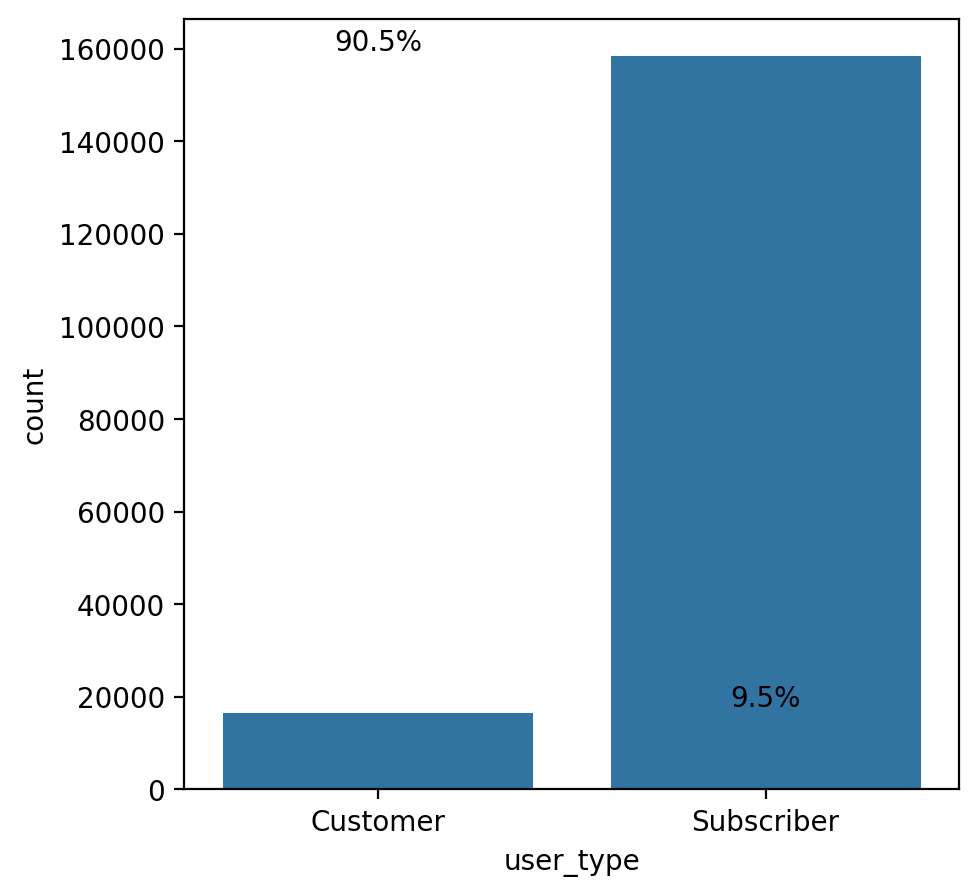

In [23]:
plt.figure(figsize=(5,5))
sns.countplot(df, x='user_type')

total_count = df['user_type'].value_counts().sum()

for i,count in enumerate(df['user_type'].value_counts()):

    text_annotation = f'{100*count/total_count:.1f}%'

    plt.text(i, count, text_annotation, fontsize=10, ha='center',va='bottom')

#### Distribution of which bikes were used most frequently based on `bike_id`

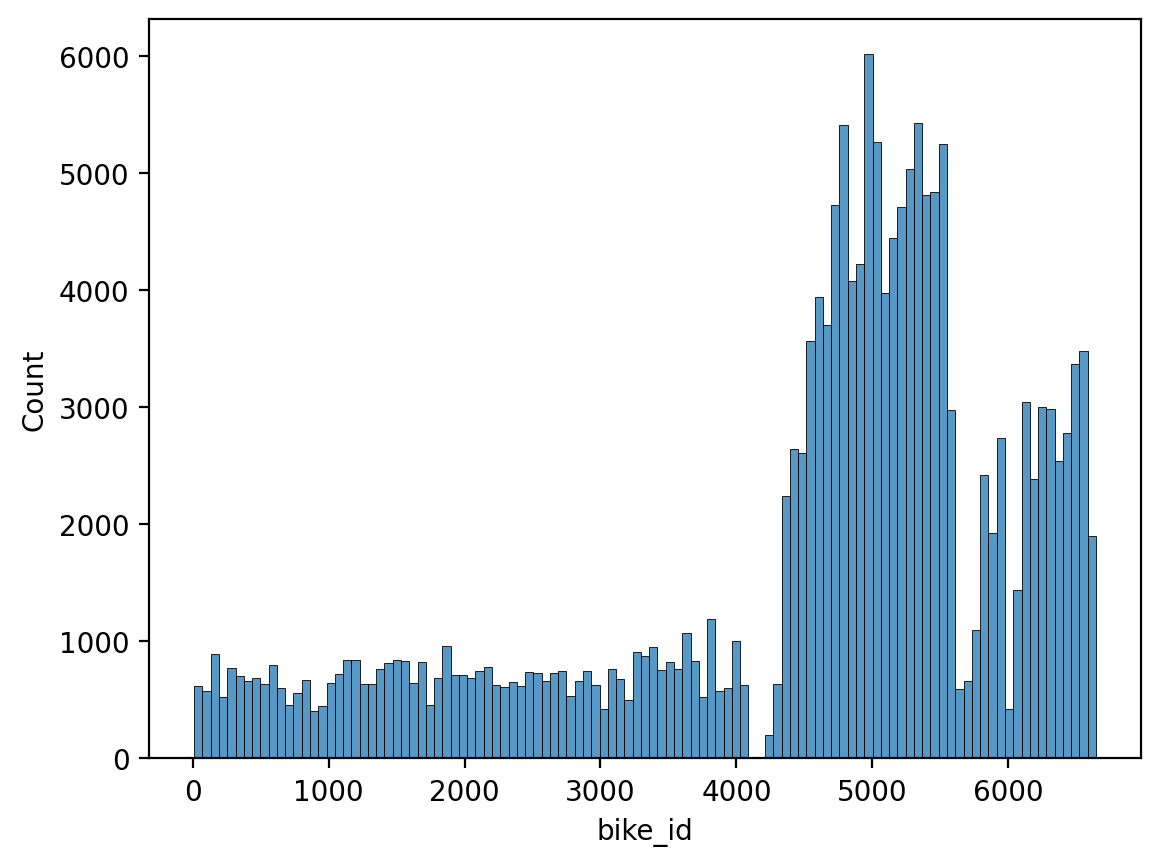

In [24]:
sns.histplot(df, x="bike_id");

#### Distribution of rent duration using `duration_sec`

There are outliers in the `duration_sec` column that were ignored during plotting, they are values over 2000 that came around to 4692 entries.

In [25]:
df['duration_sec'].describe()

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

In [26]:
df['duration_sec'].sort_values(ascending=False).head(100)

85465     84548
127999    83519
112435    83407
5203      83195
95750     82512
          ...  
69132     37276
50172     36586
3         36490
779       36190
118336    35855
Name: duration_sec, Length: 100, dtype: int64

In [27]:
len(df[df['duration_sec']>2000])

4692

In [28]:
df.loc[df['duration_sec'].sort_values(ascending=False).head(20).index]

duration_sec                start_time                  end_time  \
85465          84548  2019-02-16 15:48:25.0290  2019-02-17 15:17:33.0800   
127999         83519  2019-02-09 15:16:17.5370  2019-02-10 14:28:17.2700   
112435         83407  2019-02-11 16:25:33.0690  2019-02-12 15:35:40.9560   
5203           83195  2019-02-27 14:47:23.1810  2019-02-28 13:53:58.4330   
95750          82512  2019-02-14 13:56:21.7280  2019-02-15 12:51:34.3150   
8631           81549  2019-02-27 09:41:38.5520  2019-02-28 08:20:48.3860   
107581         79548  2019-02-12 17:45:50.5360  2019-02-13 15:51:38.8590   
90195          74408  2019-02-15 16:54:01.0600  2019-02-16 13:34:09.3670   
86454          74097  2019-02-16 16:20:41.4650  2019-02-17 12:55:38.4670   
123383         73930  2019-02-10 13:03:36.4040  2019-02-11 09:35:46.4460   
129176         72627  2019-02-09 15:15:59.2380  2019-02-10 11:26:26.3300   
116671         72590  2019-02-11 11:26:36.9850  2019-02-12 07:36:27.3610   
129177         72576  2019-02-09 15:16:26.2830  2019-02-10 11:26:02.5440   
145977         71470  2019-02-06 13:23:11.3570  2019-02-07 09:14:21.3660   
29922          70925  2019-02-24 07:08:31.2700  2019-02-25 02:50:36.5900   
14381          70211  2019-02-26 17:08:16.8970  2019-02-27 12:38:28.4360   
32098          69980  2019-02-23 19:52:25.3350  2019-02-24 15:18:46.0720   
54376          69803  2019-02-20 17:46:28.4200  2019-02-21 13:09:52.1210   
33431          69620  2019-02-23 16:33:41.5800  2019-02-24 11:54:02.4080   
120711         69335  2019-02-10 21:37:01.9930  2019-02-11 16:52:37.3450   

        start_station_id                                start_station_name  \
85465                3.0      Powell St BART Station (Market St at 4th St)   
127999              72.0                               Page St at Scott St   
112435              77.0                              11th St at Natoma St   
5203               243.0                       Bancroft Way at College Ave   
95750              368.0                              Myrtle St at Polk St   
8631               138.0                            Jersey St at Church St   
107581              79.0                              7th St at Brannan St   
90195                3.0      Powell St BART Station (Market St at 4th St)   
86454               99.0                              Folsom St at 15th St   
123383             270.0                             Ninth St at Heinz Ave   
129176              72.0                               Page St at Scott St   
116671              39.0                       Scott St at Golden Gate Ave   
129177              72.0                               Page St at Scott St   
145977             368.0                              Myrtle St at Polk St   
29922              375.0                           Grove St at Masonic Ave   
14381               80.0                             Townsend St at 5th St   
32098               21.0  Montgomery St BART Station (Market St at 2nd St)   
54376                5.0      Powell St BART Station (Market St at 5th St)   
33431               90.0                             Townsend St at 7th St   
120711             321.0                                  5th St at Folsom   

        start_station_latitude  start_station_longitude  end_station_id  \
85465                37.786375              -122.404904           368.0   
127999               37.772406              -122.435650            43.0   
112435               37.773507              -122.416040           344.0   
5203                 37.869360              -122.254337           248.0   
95750                37.785434              -122.419622            44.0   
8631                 37.750900              -122.427411           140.0   
107581               37.773492              -122.403672            66.0   
90195                37.786375              -122.404904            86.0   
86454                37.767037              -122.415442           139.0   
123383               3

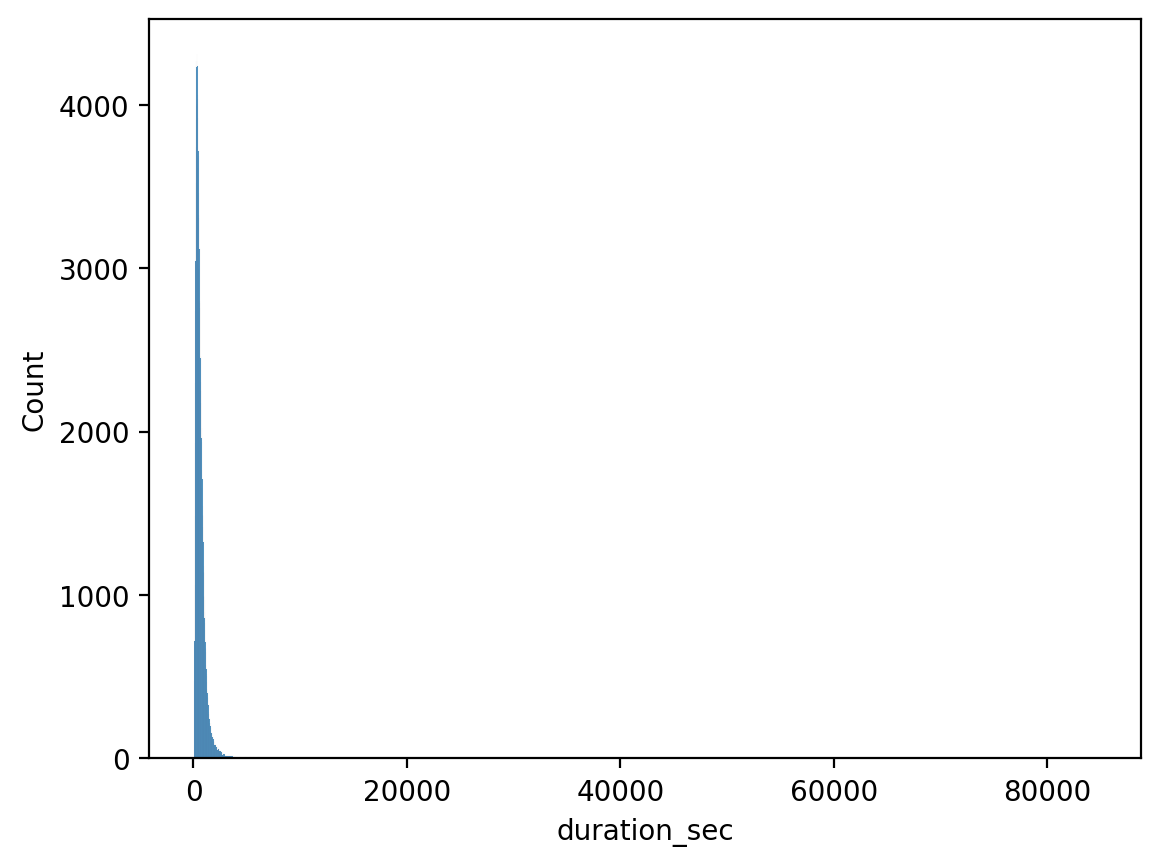

In [29]:
sns.histplot(df, x='duration_sec');

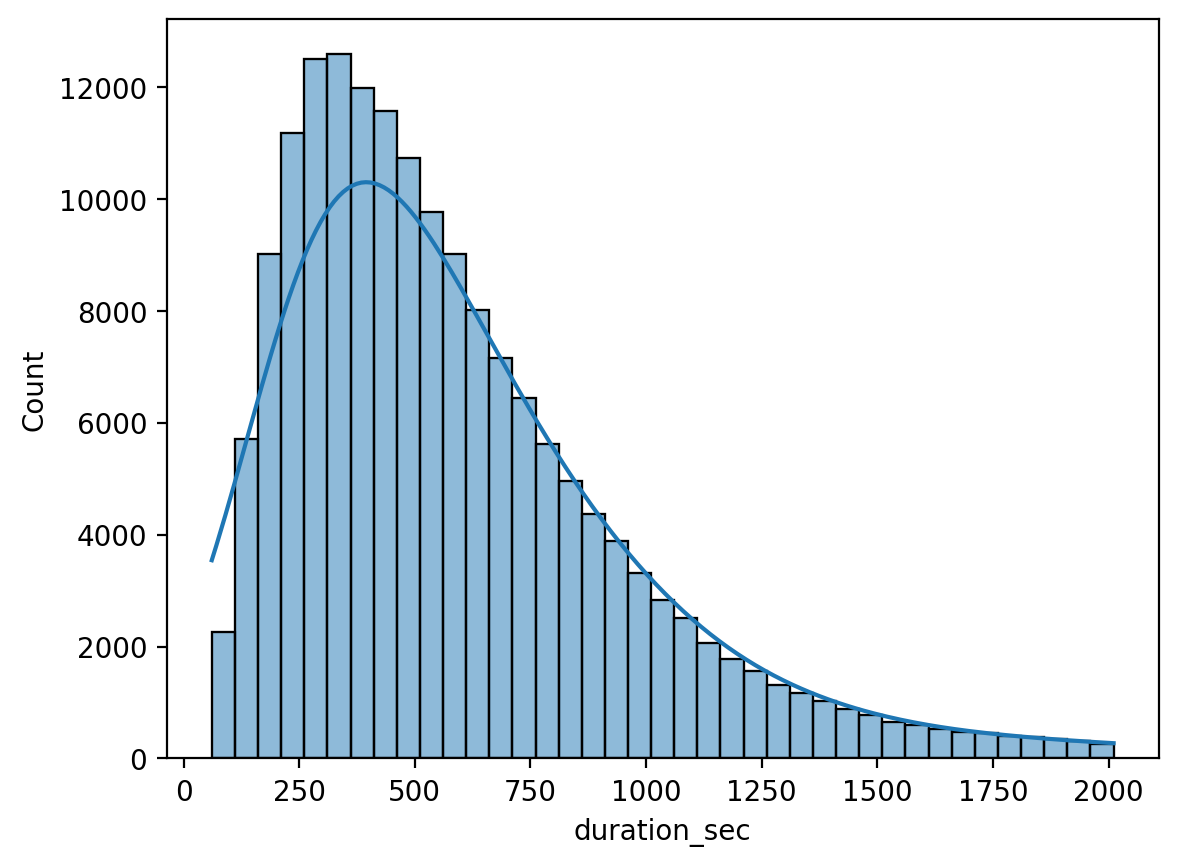

In [30]:
bins = np.arange(np.around(df['duration_sec'].min()),2000+50, 50)
sns.histplot(df, x='duration_sec',bins=bins,kde=True, kde_kws=dict(clip=(bins.min(), bins.max())));

#### Number of bike rentals per gender using `member_gender`

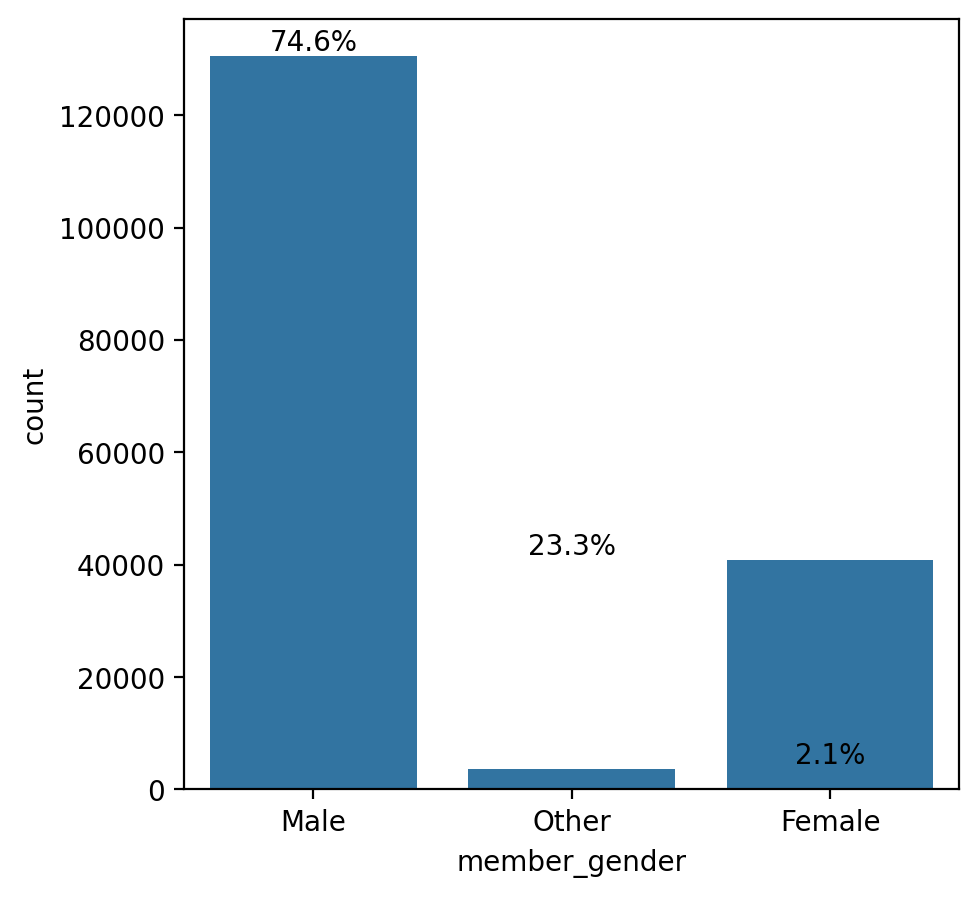

In [31]:
plt.figure(figsize=(5,5))
sns.countplot(df,x='member_gender');
total_count = df['member_gender'].value_counts().sum()

for i,count in enumerate(df['member_gender'].value_counts()):

    text_annotation = f'{100*count/total_count:.1f}%'

    plt.text(i, count, text_annotation, fontsize=10, ha='center',va='bottom')

#### Distribution of bike renters age using `age`

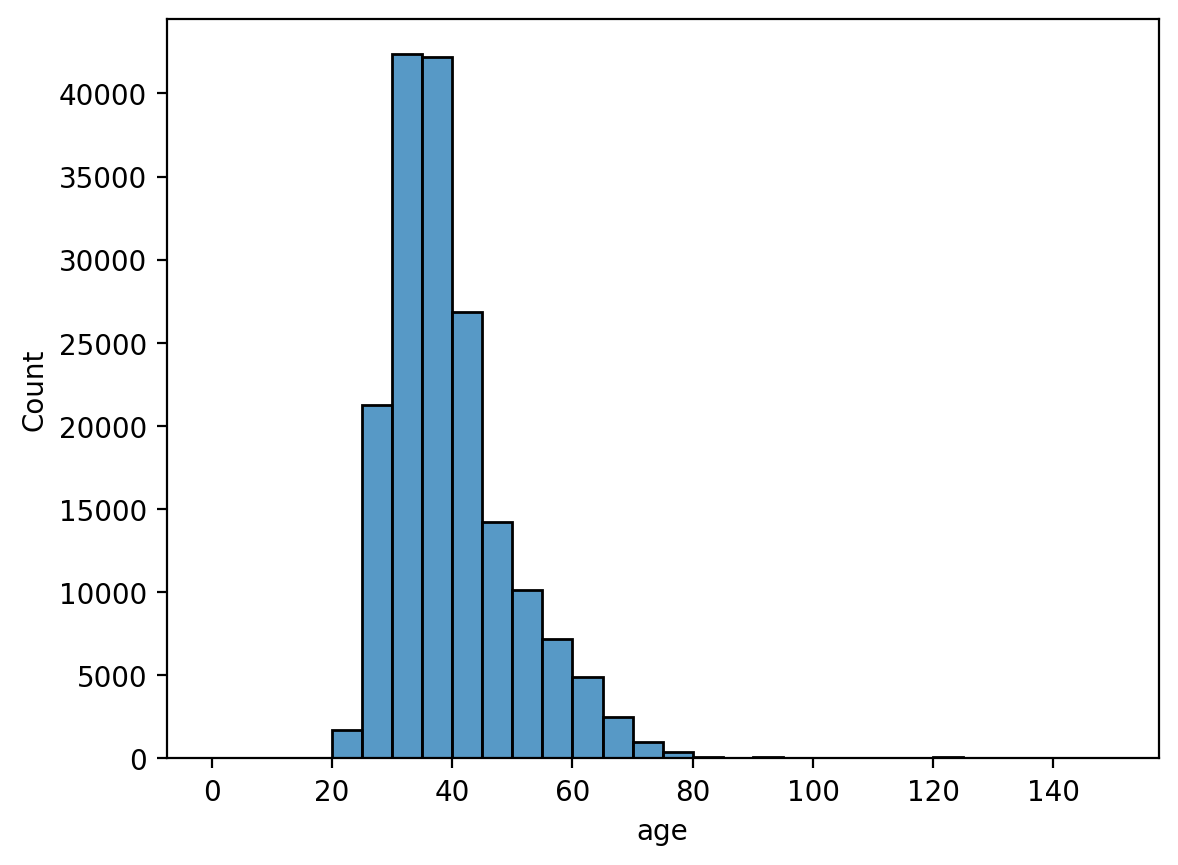

In [32]:
bins = np.arange(0,155,5)
sns.histplot(df, x='age',bins=bins);

It's highly unlikely anyone over 80 is going to be going on bicycle trips, these are considered outliers.

In [33]:
df['age'].describe()

count    174952.000000
mean         39.196865
std          10.118731
min          23.000000
25%          32.000000
50%          37.000000
75%          44.000000
max         146.000000
Name: age, dtype: float64

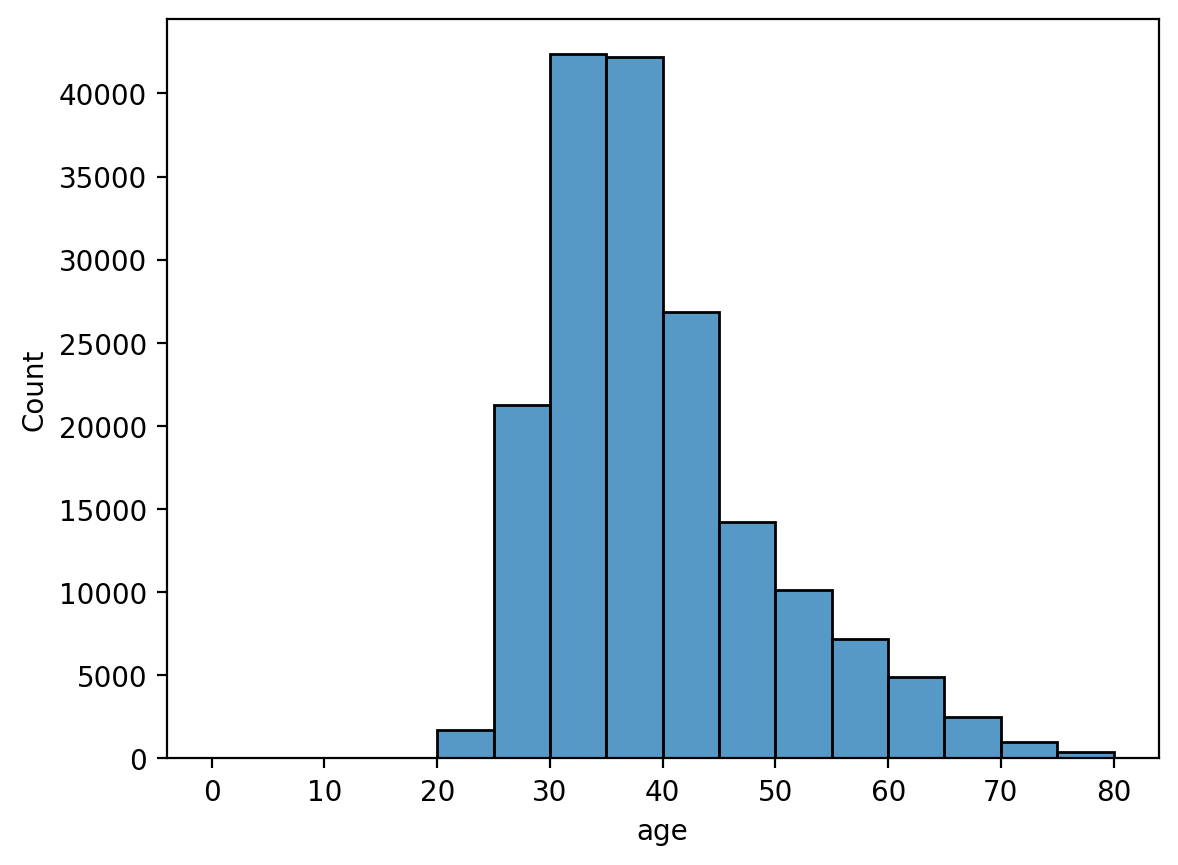

In [34]:
bins = np.arange(0,85,5)
sns.histplot(df, x='age',bins=bins);

#### Distribution of distance travelled by renters using `distance`

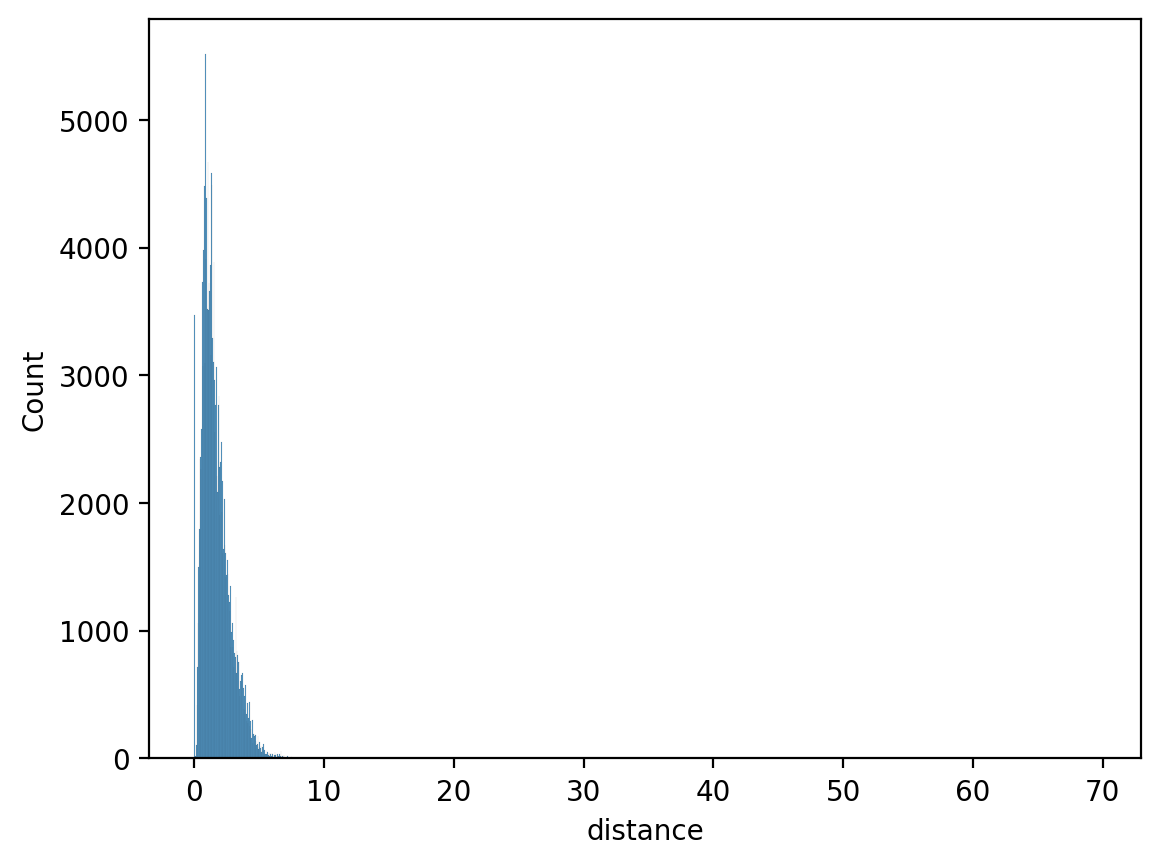

In [35]:
sns.histplot(df, x='distance');

In [36]:
df['distance'].sort_values(ascending=False)

112038    69.469241
19827     15.673955
50859     14.099709
153112    13.894462
87602     13.590843
            ...    
99192      0.000000
169177     0.000000
82988      0.000000
99150      0.000000
77702      0.000000
Name: distance, Length: 174952, dtype: float64

There are some outliers in the distance column

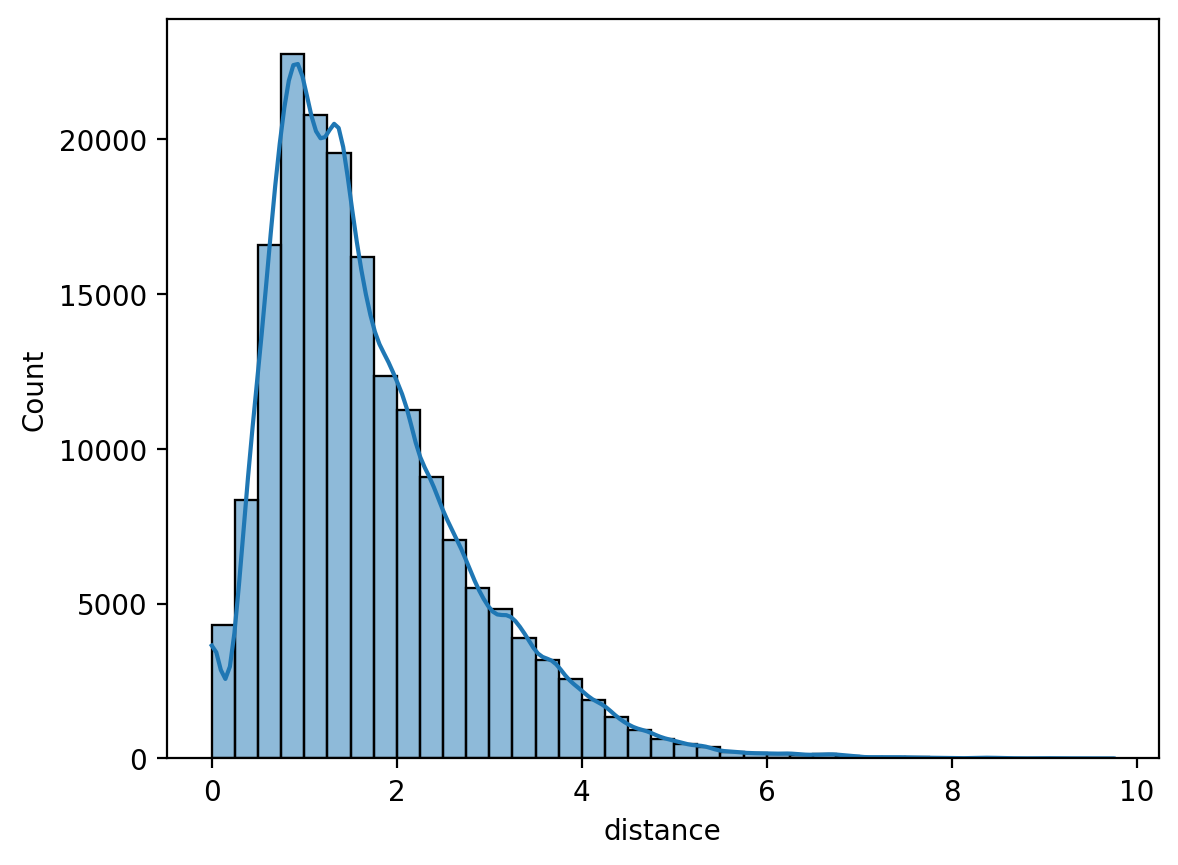

In [37]:
bins = np.arange(np.around(df['distance'].min()),10, 0.25)
sns.histplot(df, x='distance',bins=bins,kde=True, kde_kws=dict(clip=(bins.min(), bins.max())));

In [38]:
len(df[df['distance']>10])

9

Some trips have a distance of zero, meaning the bikes were rented but were not used.

In [39]:
df[(df['start_station_latitude'] == df['end_station_latitude']) & ( df['start_station_longitude'] == df['end_station_longitude'] ) ] 

duration_sec                start_time                  end_time  \
19               874  2019-02-28 23:43:05.1830  2019-02-28 23:57:39.7960   
27               408  2019-02-28 23:48:08.2820  2019-02-28 23:54:56.9300   
34               471  2019-02-28 23:42:43.3610  2019-02-28 23:50:34.4460   
55              3478  2019-02-28 22:39:35.0200  2019-02-28 23:37:33.3420   
56              3140  2019-02-28 22:44:53.5030  2019-02-28 23:37:14.0900   
...              ...                       ...                       ...   
183317          1476  2019-02-01 02:45:04.7440  2019-02-01 03:09:41.1840   
183318           877  2019-02-01 02:53:15.9950  2019-02-01 03:07:53.0580   
183326          5713  2019-02-01 01:02:55.1680  2019-02-01 02:38:09.0020   
183350           874  2019-02-01 01:41:43.4140  2019-02-01 01:56:17.5520   
183380           943  2019-02-01 00:43:11.5500  2019-02-01 00:58:55.2170   

        start_station_id           start_station_name  start_station_latitude  \
19                 180.0     Telegraph Ave at 23rd St               37.812678   
27                  78.0          Folsom St at 9th St               37.773717   
34                 133.0       Valencia St at 22nd St               37.755213   
55                  11.0       Davis St at Jackson St               37.797280   
56                  11.0       Davis St at Jackson St               37.797280   
...                  ...                          ...                     ...   
183317             345.0        Hubbell St at 16th St               37.766483   
183318             385.0  Woolsey St at Sacramento St               37.850578   
183326              31.0   Raymond Kimbell Playground               37.783813   
183350             253.0      Haste St at College Ave               37.866418   
183380              31.0   Raymond Kimbell Playground               37.783813   

        start_station_longitude  end_station_id             end_station_name  \
19                  -122.268773           180.0     Telegraph Ave at 23rd St   
27                  -122.411647            78.0          Folsom St at 9th St   
34                  -122.420975           133.0       Valencia St at 22nd St   
55                  -122.398436            11.0       Davis St at Jackson St   
56                  -122.398436            11.0       Davis St at Jackson St   
...                         ...             ...                          ...   
183317              -122.398279           345.0        Hubbell St at 16th St   
183318              -122.278175           385.0  Woolsey St at Sacramento St   
183326              -122.434559            31.0   Raymond Kimbell Playground   
183350              -122.253799           253.0      Haste St at College Ave   
183380              -122.434559            31.0   Raymond Kimbell Playground   

        end_station_latitude  end_station_longitude  bike_id   user_type  \
19                 37.812678            -122.268773     5629    Customer   
27                 37.773717            -122.411647     5410  Subscriber   
34                 37.755213            -122.420975     5559  Subscriber   
55                 37.797280            -122.398436     1846  Subscriber   
56                 37.797280            -122.398436     3040  Subscriber   
...                      ...                    ...      ...         ...   
183317             37.766483            -122.398279     5224  Subscriber   
183318             37.850578            -122.278175     4913  Subscriber   
183326             37.783813            -122.434559     5366  Subscriber   
183350             37.866418            -122.253799     3232  Subscriber   
183380             37.783813            -122.434559     5343  Subscriber   

        member_birth_year member_gender bike_share_for_all_trip  distance  age  
19                 1978.0          Male                      No       0.0   46  
27                 1982.0          Male                      No       0.0   42  
34   

### Cleaning based on distributions

#### Cleaning `distance`

In [40]:
len(df[df['distance'] > 10])

9

In [41]:
df = df[df['distance'] <= 10]

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174943 entries, 0 to 183411
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174943 non-null  int64  
 1   start_time               174943 non-null  object 
 2   end_time                 174943 non-null  object 
 3   start_station_id         174943 non-null  float64
 4   start_station_name       174943 non-null  object 
 5   start_station_latitude   174943 non-null  float64
 6   start_station_longitude  174943 non-null  float64
 7   end_station_id           174943 non-null  float64
 8   end_station_name         174943 non-null  object 
 9   end_station_latitude     174943 non-null  float64
 10  end_station_longitude    174943 non-null  float64
 11  bike_id                  174943 non-null  int64  
 12  user_type                174943 non-null  object 
 13  member_birth_year        174943 non-null  float64
 14  member_ge

#### Cleaning `age`

In [43]:
len(df[df['age'] > 80])

263

In [44]:
df = df[df['age'] <= 80]

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174680 entries, 0 to 183411
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174680 non-null  int64  
 1   start_time               174680 non-null  object 
 2   end_time                 174680 non-null  object 
 3   start_station_id         174680 non-null  float64
 4   start_station_name       174680 non-null  object 
 5   start_station_latitude   174680 non-null  float64
 6   start_station_longitude  174680 non-null  float64
 7   end_station_id           174680 non-null  float64
 8   end_station_name         174680 non-null  object 
 9   end_station_latitude     174680 non-null  float64
 10  end_station_longitude    174680 non-null  float64
 11  bike_id                  174680 non-null  int64  
 12  user_type                174680 non-null  object 
 13  member_birth_year        174680 non-null  float64
 14  member_ge

#### Cleaning `duration_sec`

In [46]:
len(df[df['duration_sec']>2000])

4681

In [47]:
df = df[df['duration_sec'] <= 2000]

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 169999 entries, 4 to 183411
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             169999 non-null  int64  
 1   start_time               169999 non-null  object 
 2   end_time                 169999 non-null  object 
 3   start_station_id         169999 non-null  float64
 4   start_station_name       169999 non-null  object 
 5   start_station_latitude   169999 non-null  float64
 6   start_station_longitude  169999 non-null  float64
 7   end_station_id           169999 non-null  float64
 8   end_station_name         169999 non-null  object 
 9   end_station_latitude     169999 non-null  float64
 10  end_station_longitude    169999 non-null  float64
 11  bike_id                  169999 non-null  int64  
 12  user_type                169999 non-null  object 
 13  member_birth_year        169999 non-null  float64
 14  member_ge

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The `bike_id` distribution graph indicated that most people tended to use bikes whose ids are in the 5000 range. The `user_type` count plot indicated that most bike renters are subscribers rather than one-time customers, with 91.2% being subscribers and 8.8% one-time customers. The `duration_sec` distribution graph indicated most bike rides tended to last 200-800 seconds. The `member_gender` count plot shows that most bike renters tend to be male; where 74.8% were male, 23.2% were female and 2% identified as other.  The `age` distribution graph showed most bike renter's age were between 25 to 45 years. The `distance` distribution graph showed most bike trips travelled between 0.25 to 2.75 km.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

There some bike riders that were above the age of 80, that seemed unlikely and considered to be outliers. Distances above 10 km seemed to be outliers. There were some distances that are 0 km which indicated that the bikes were rented but not used, which came up to 3548 trips. Durations tended to be within 100 to 2000 range, values above 2000 were considered to be outliers.

## Bivariate Exploration

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 169999 entries, 4 to 183411
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             169999 non-null  int64  
 1   start_time               169999 non-null  object 
 2   end_time                 169999 non-null  object 
 3   start_station_id         169999 non-null  float64
 4   start_station_name       169999 non-null  object 
 5   start_station_latitude   169999 non-null  float64
 6   start_station_longitude  169999 non-null  float64
 7   end_station_id           169999 non-null  float64
 8   end_station_name         169999 non-null  object 
 9   end_station_latitude     169999 non-null  float64
 10  end_station_longitude    169999 non-null  float64
 11  bike_id                  169999 non-null  int64  
 12  user_type                169999 non-null  object 
 13  member_birth_year        169999 non-null  float64
 14  member_ge

### Bar plots

<Axes: xlabel='start_station_id', ylabel='distance'>

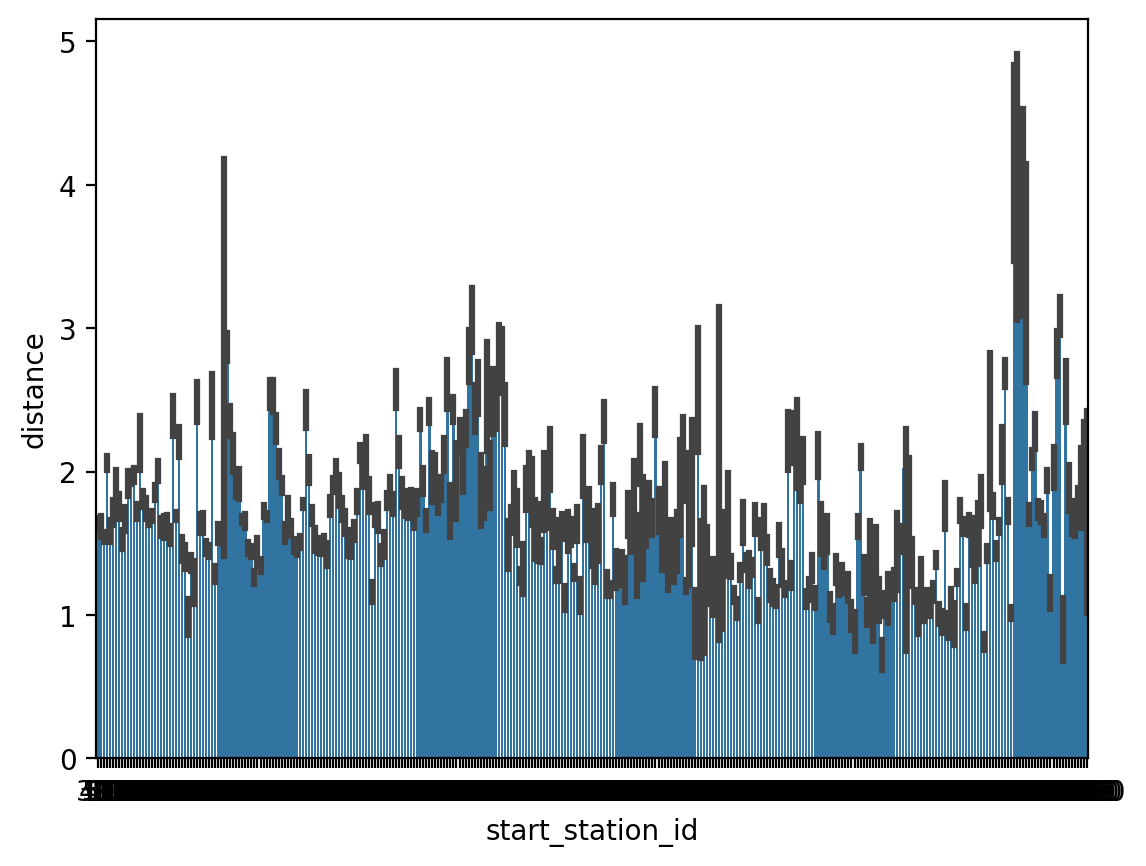

In [50]:
sns.barplot(df, x='start_station_id',y='distance')

<Axes: xlabel='end_station_id', ylabel='distance'>

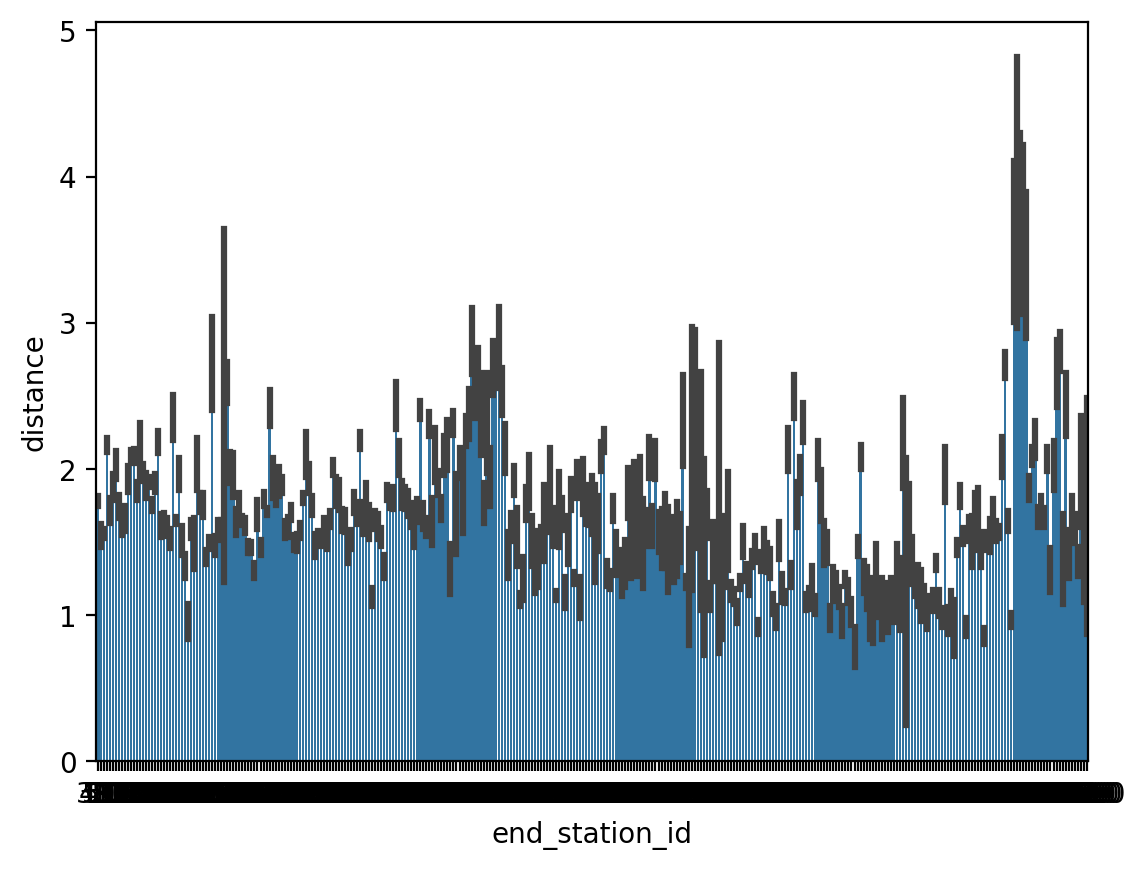

In [51]:
sns.barplot(df, x='end_station_id',y='distance')

### Box Plots

#### `member_gender` box plots

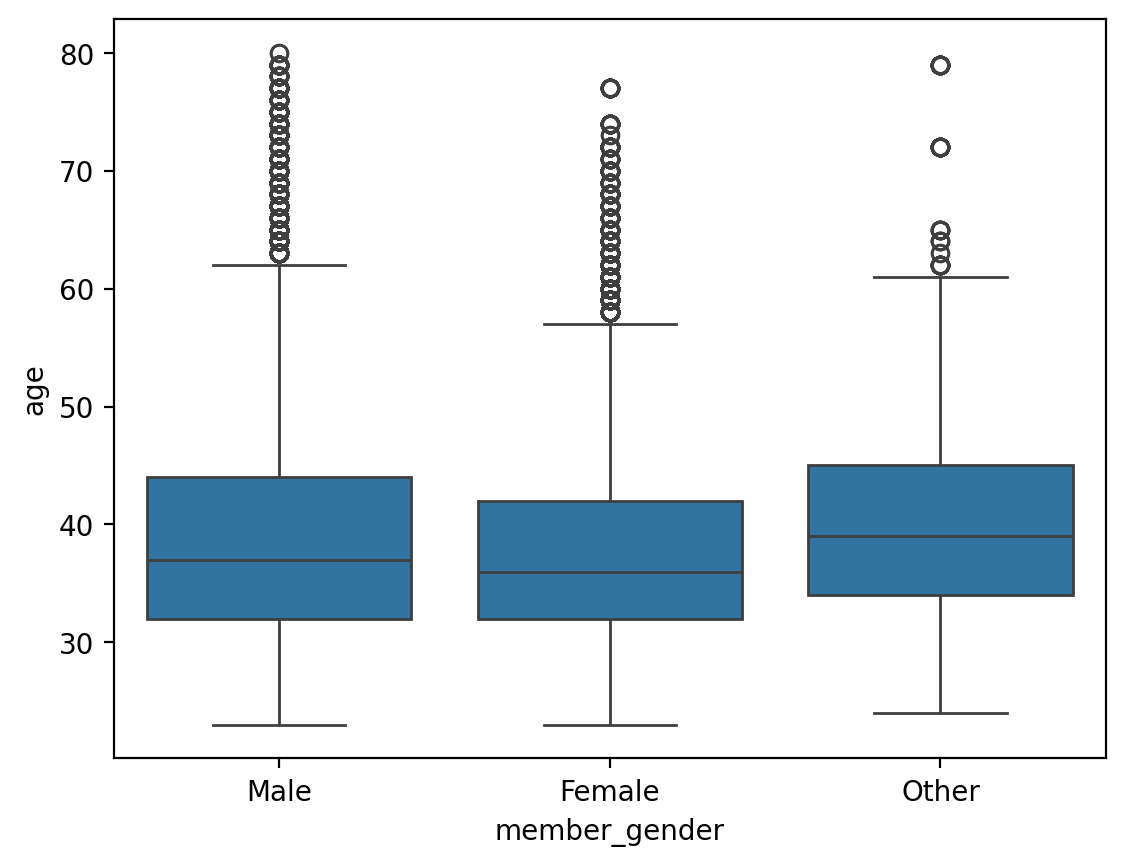

In [52]:
sns.boxplot(df,x='member_gender',y='age');

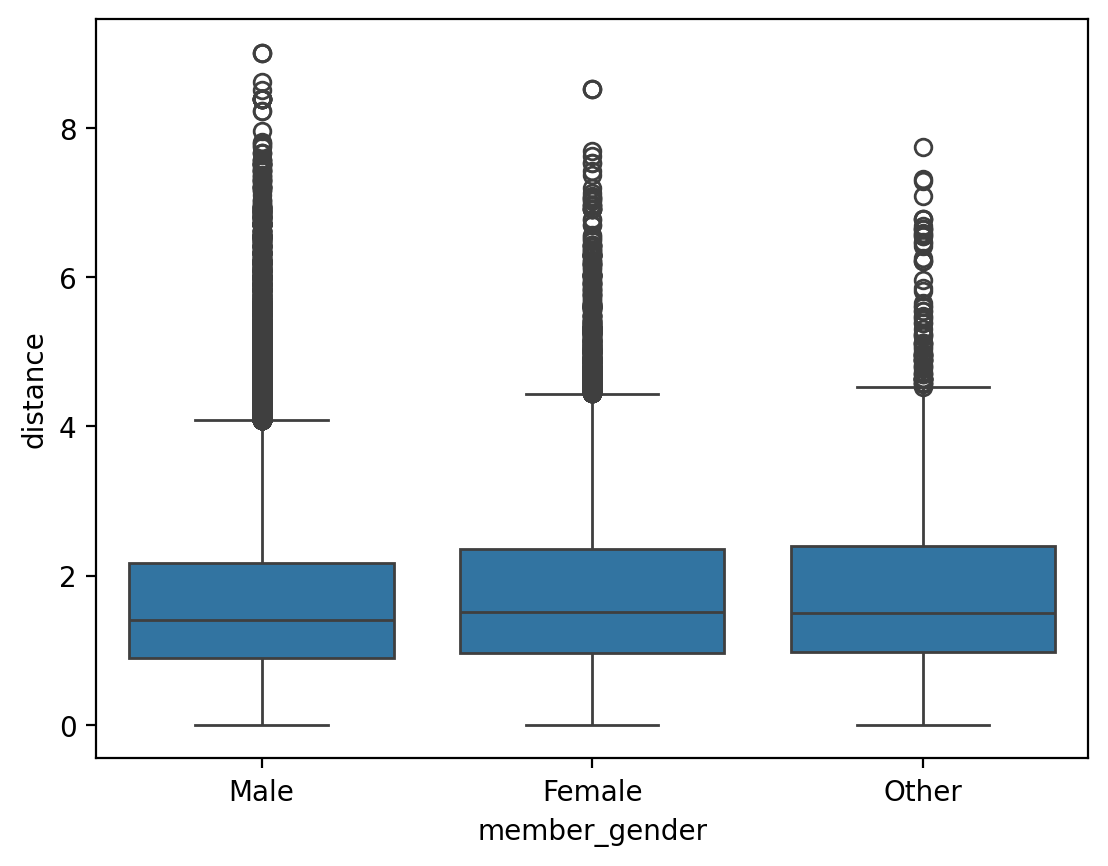

In [53]:
sns.boxplot(df,x='member_gender',y='distance'); 

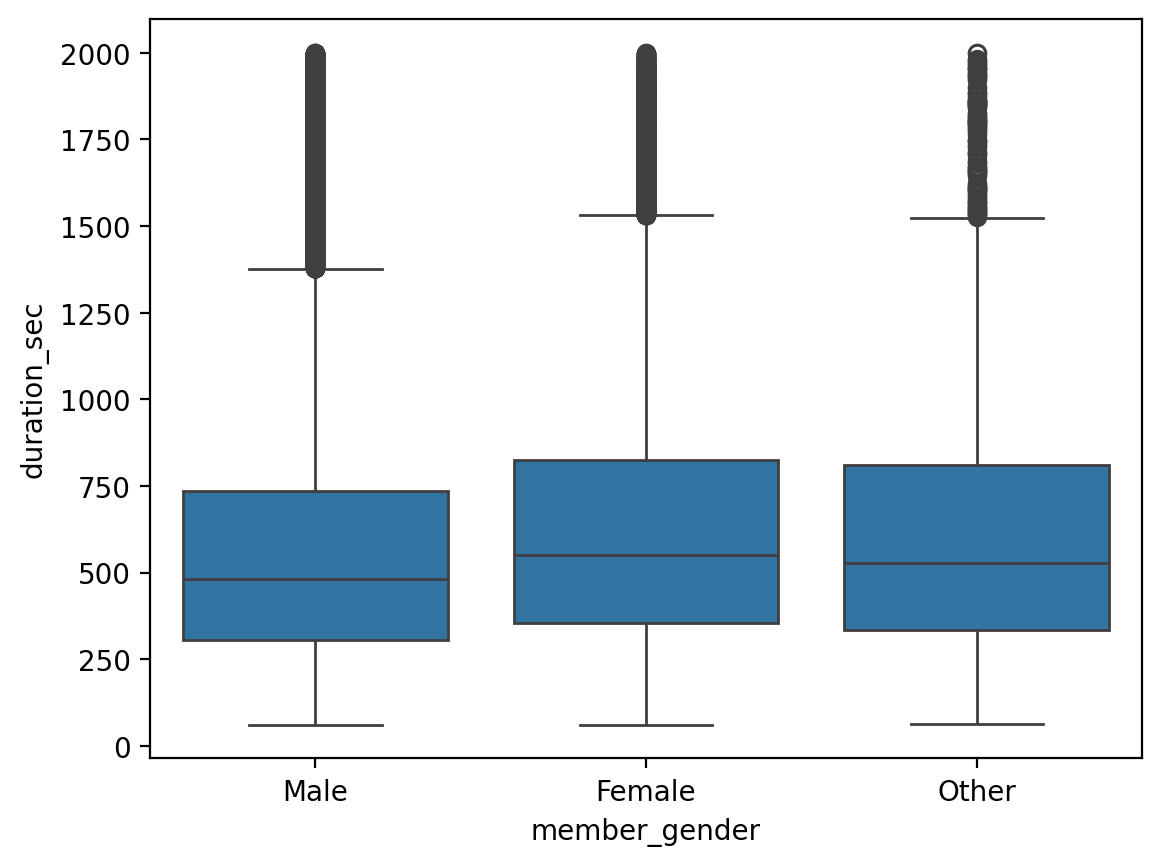

In [54]:
sns.boxplot(df,x='member_gender',y='duration_sec'); 

#### `user_type` box plots

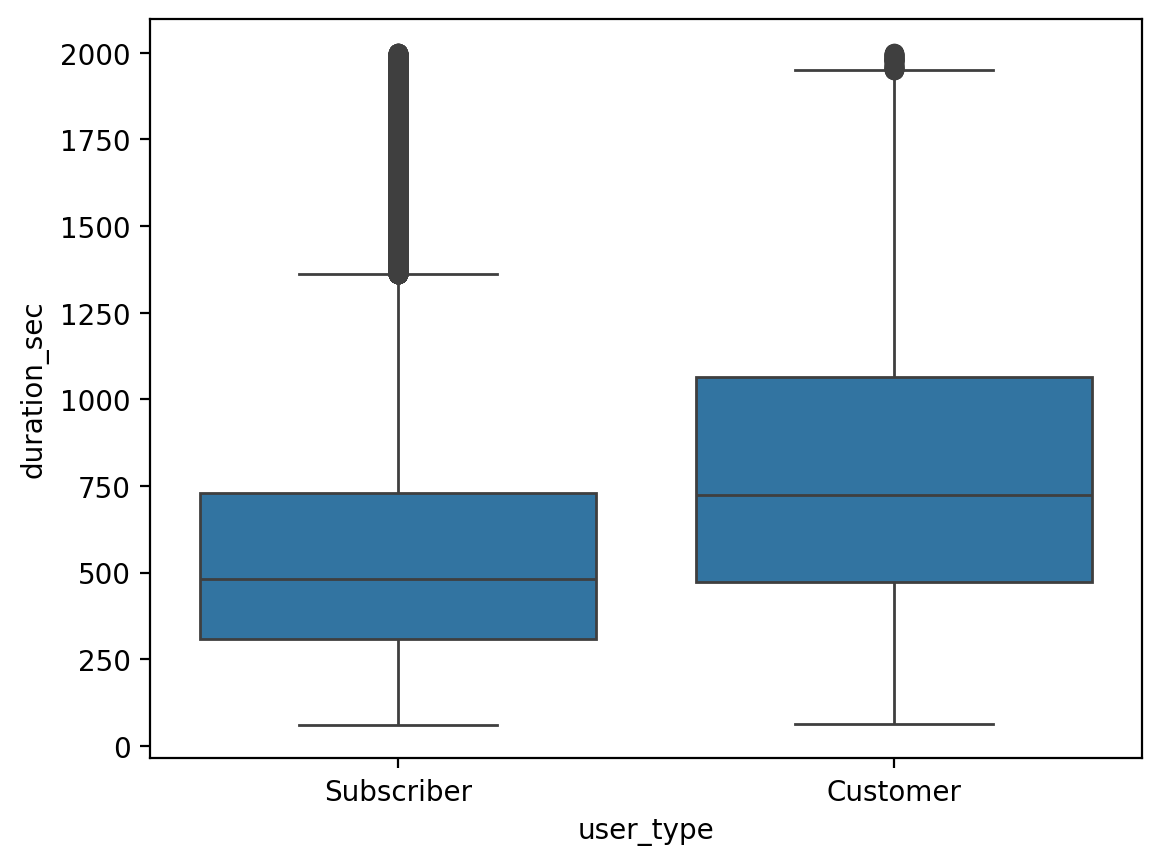

In [55]:
sns.boxplot(df,x='user_type',y='duration_sec'); 

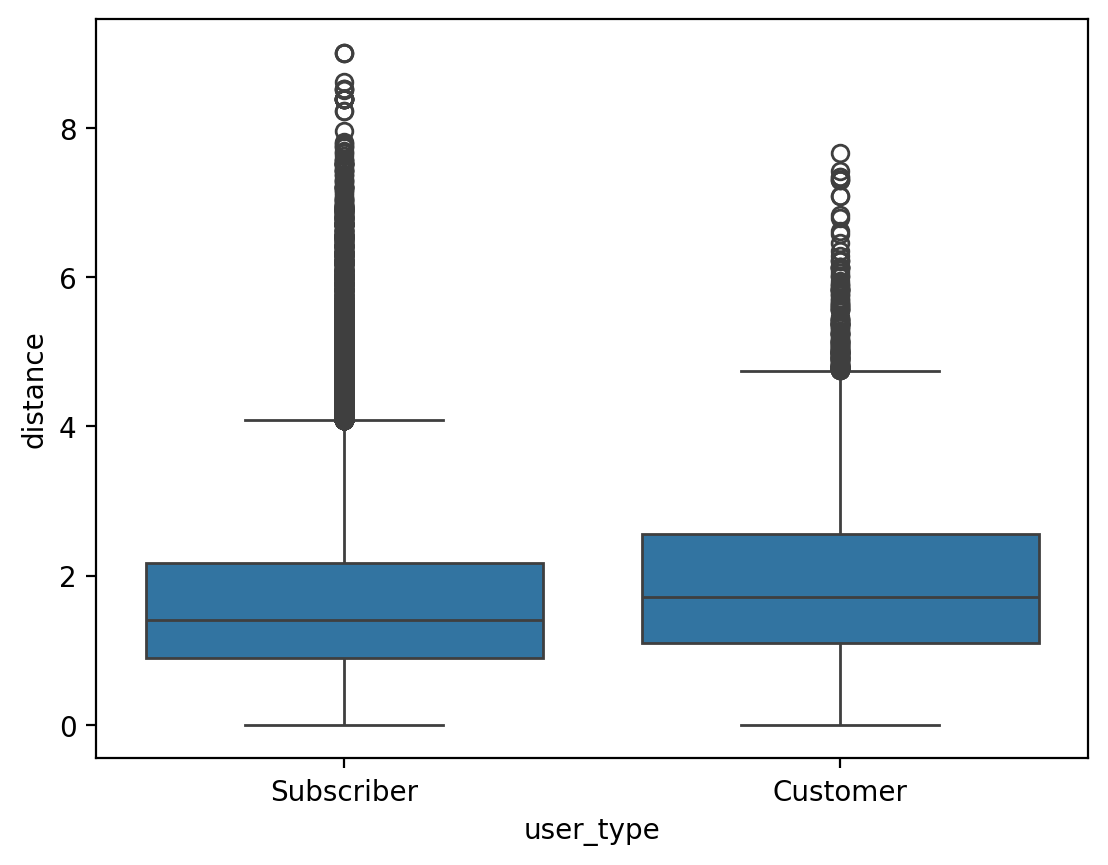

In [56]:
sns.boxplot(df,x='user_type',y='distance'); 

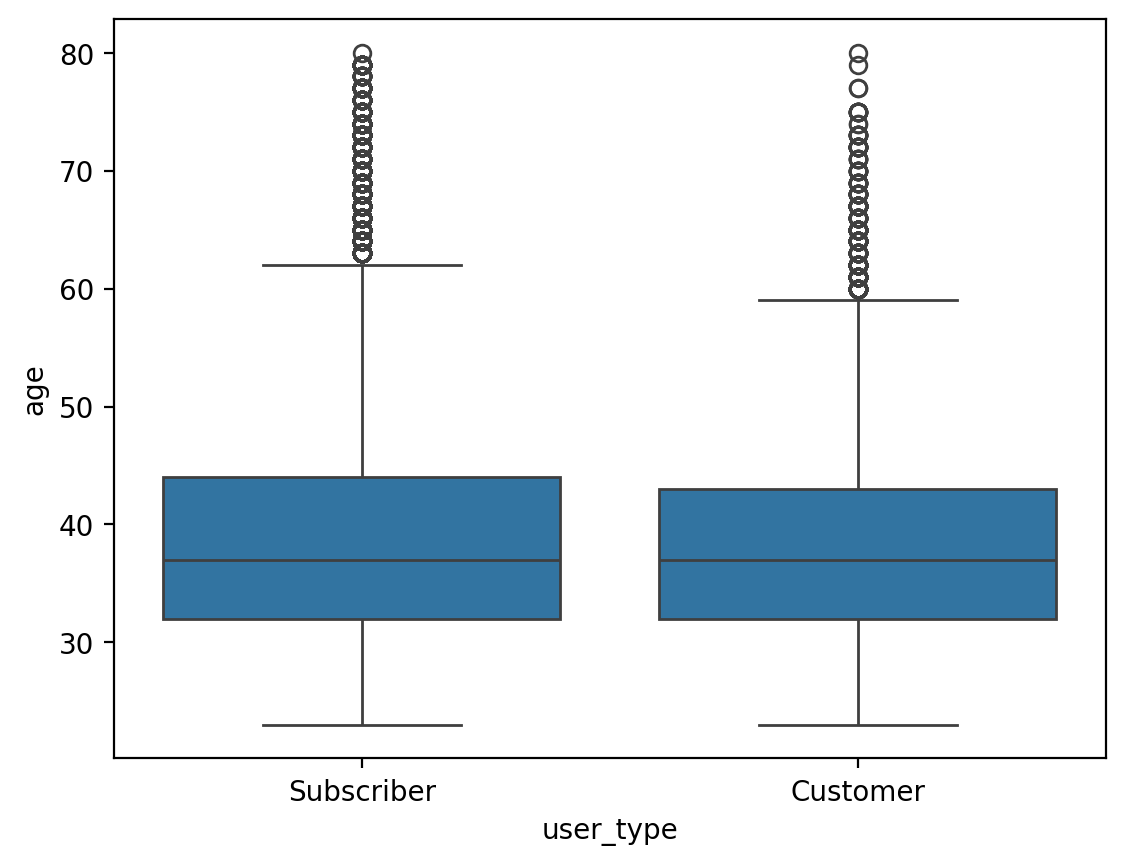

In [57]:
sns.boxplot(df,x='user_type',y='age'); 

### Scatter plots

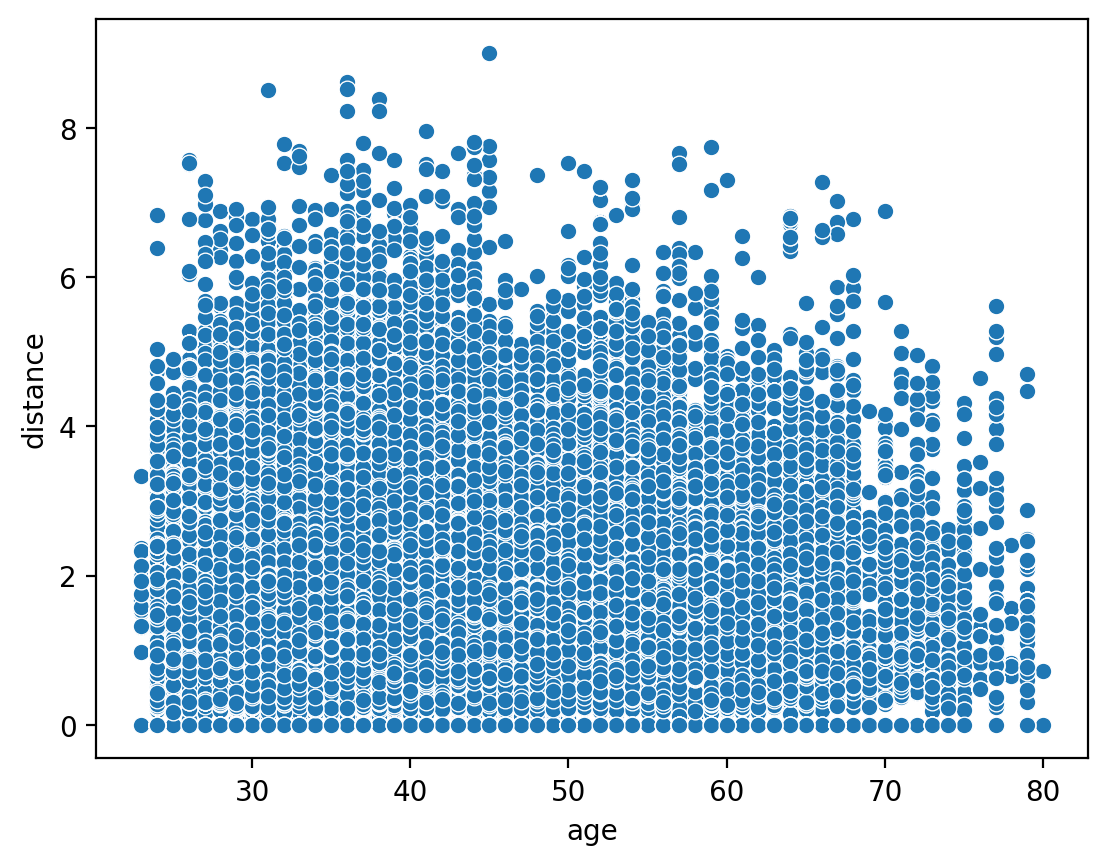

In [58]:
sns.scatterplot(df, x='age', y='distance');

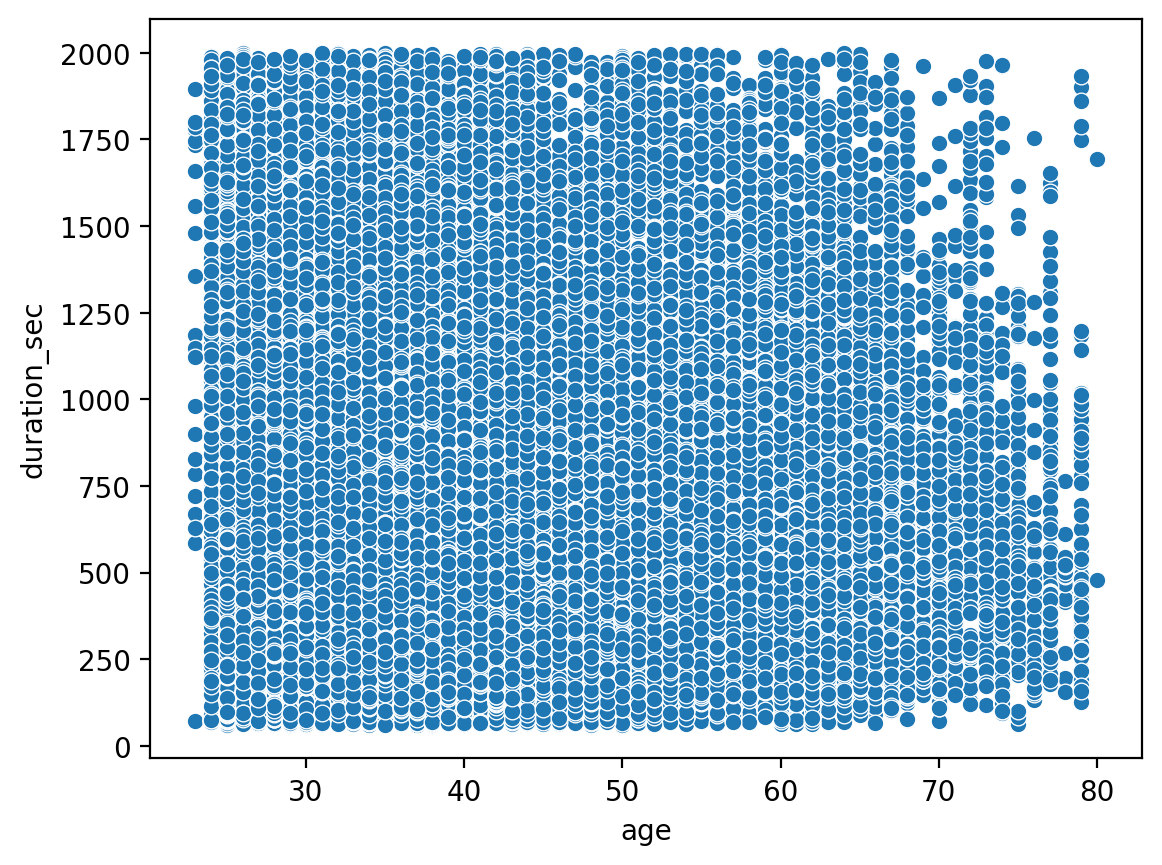

In [59]:
sns.scatterplot(df, x='age', y='duration_sec');

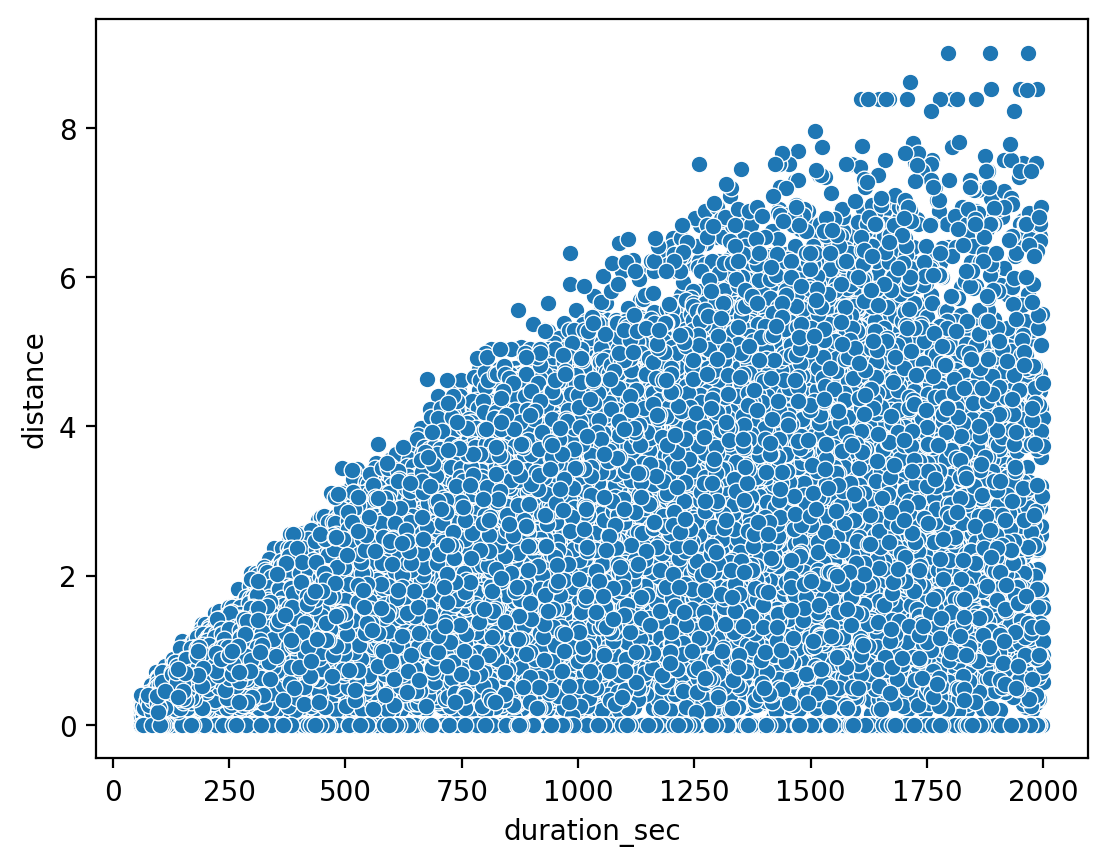

In [60]:
sns.scatterplot(df, x='duration_sec', y='distance');

### Grouped bar chart

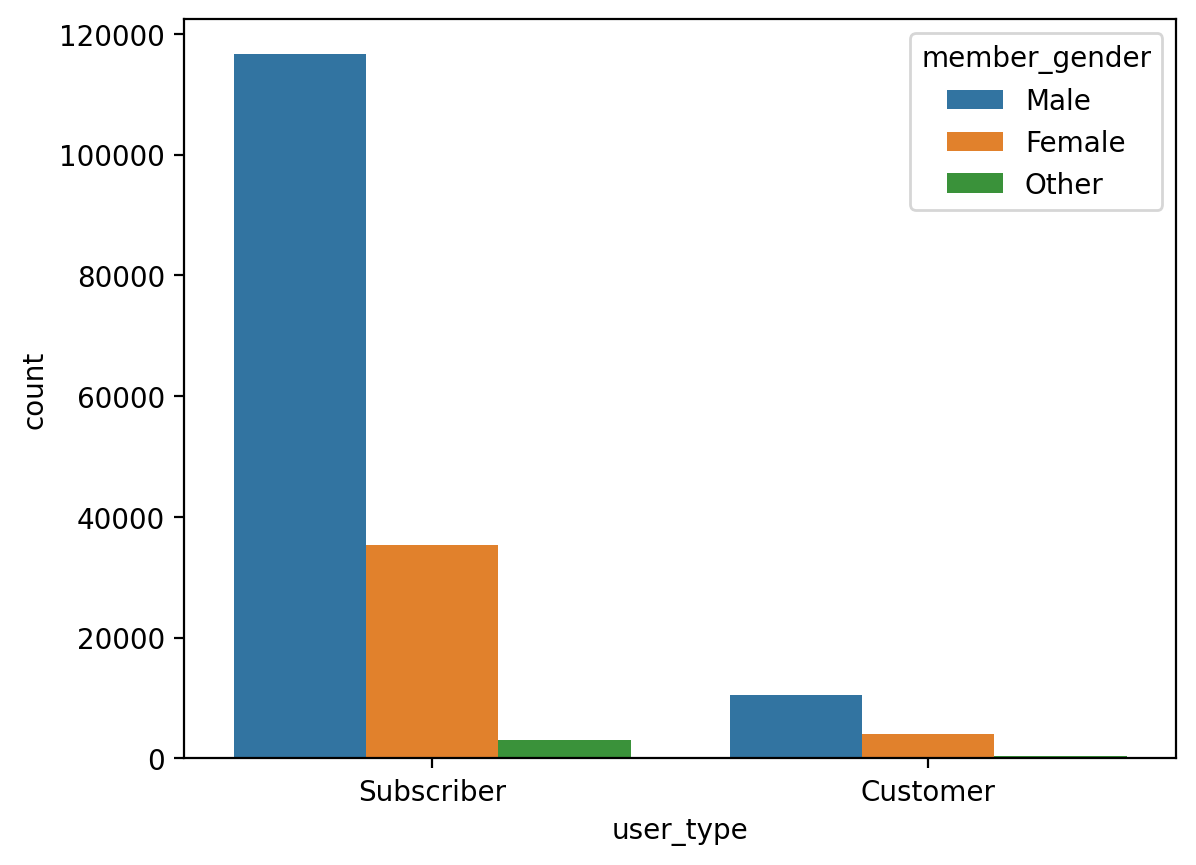

In [61]:
sns.countplot(df, x='user_type',hue='member_gender');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Most of the variables followed trends seen in univariate analysis. For example, most bike renters tended to be males followed by females, so in the grouped bar chart, it was found most subscribes were male followed females, the same was found for customers. Most variables in the scatter plots were found to not have a correlation, except for the duration and distance, where bikes that have travelled longer distances tended to be rented for longer periods. Most box plots did not show a tightly correlated variables, but they showed customers tended to rent bikes for longer than subscribers which lead to a slight increase in customer distance travelled as compared to subscriber distance travelled. Box plots also showed women were slighly more likely to rent a bike for longer.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Though not a feature of interest, stations `start_station_id` and `end_station_id` did not have many bikes travelling over 2 km, with some exceptions.

## Multivariate Exploration

### Facet Plots

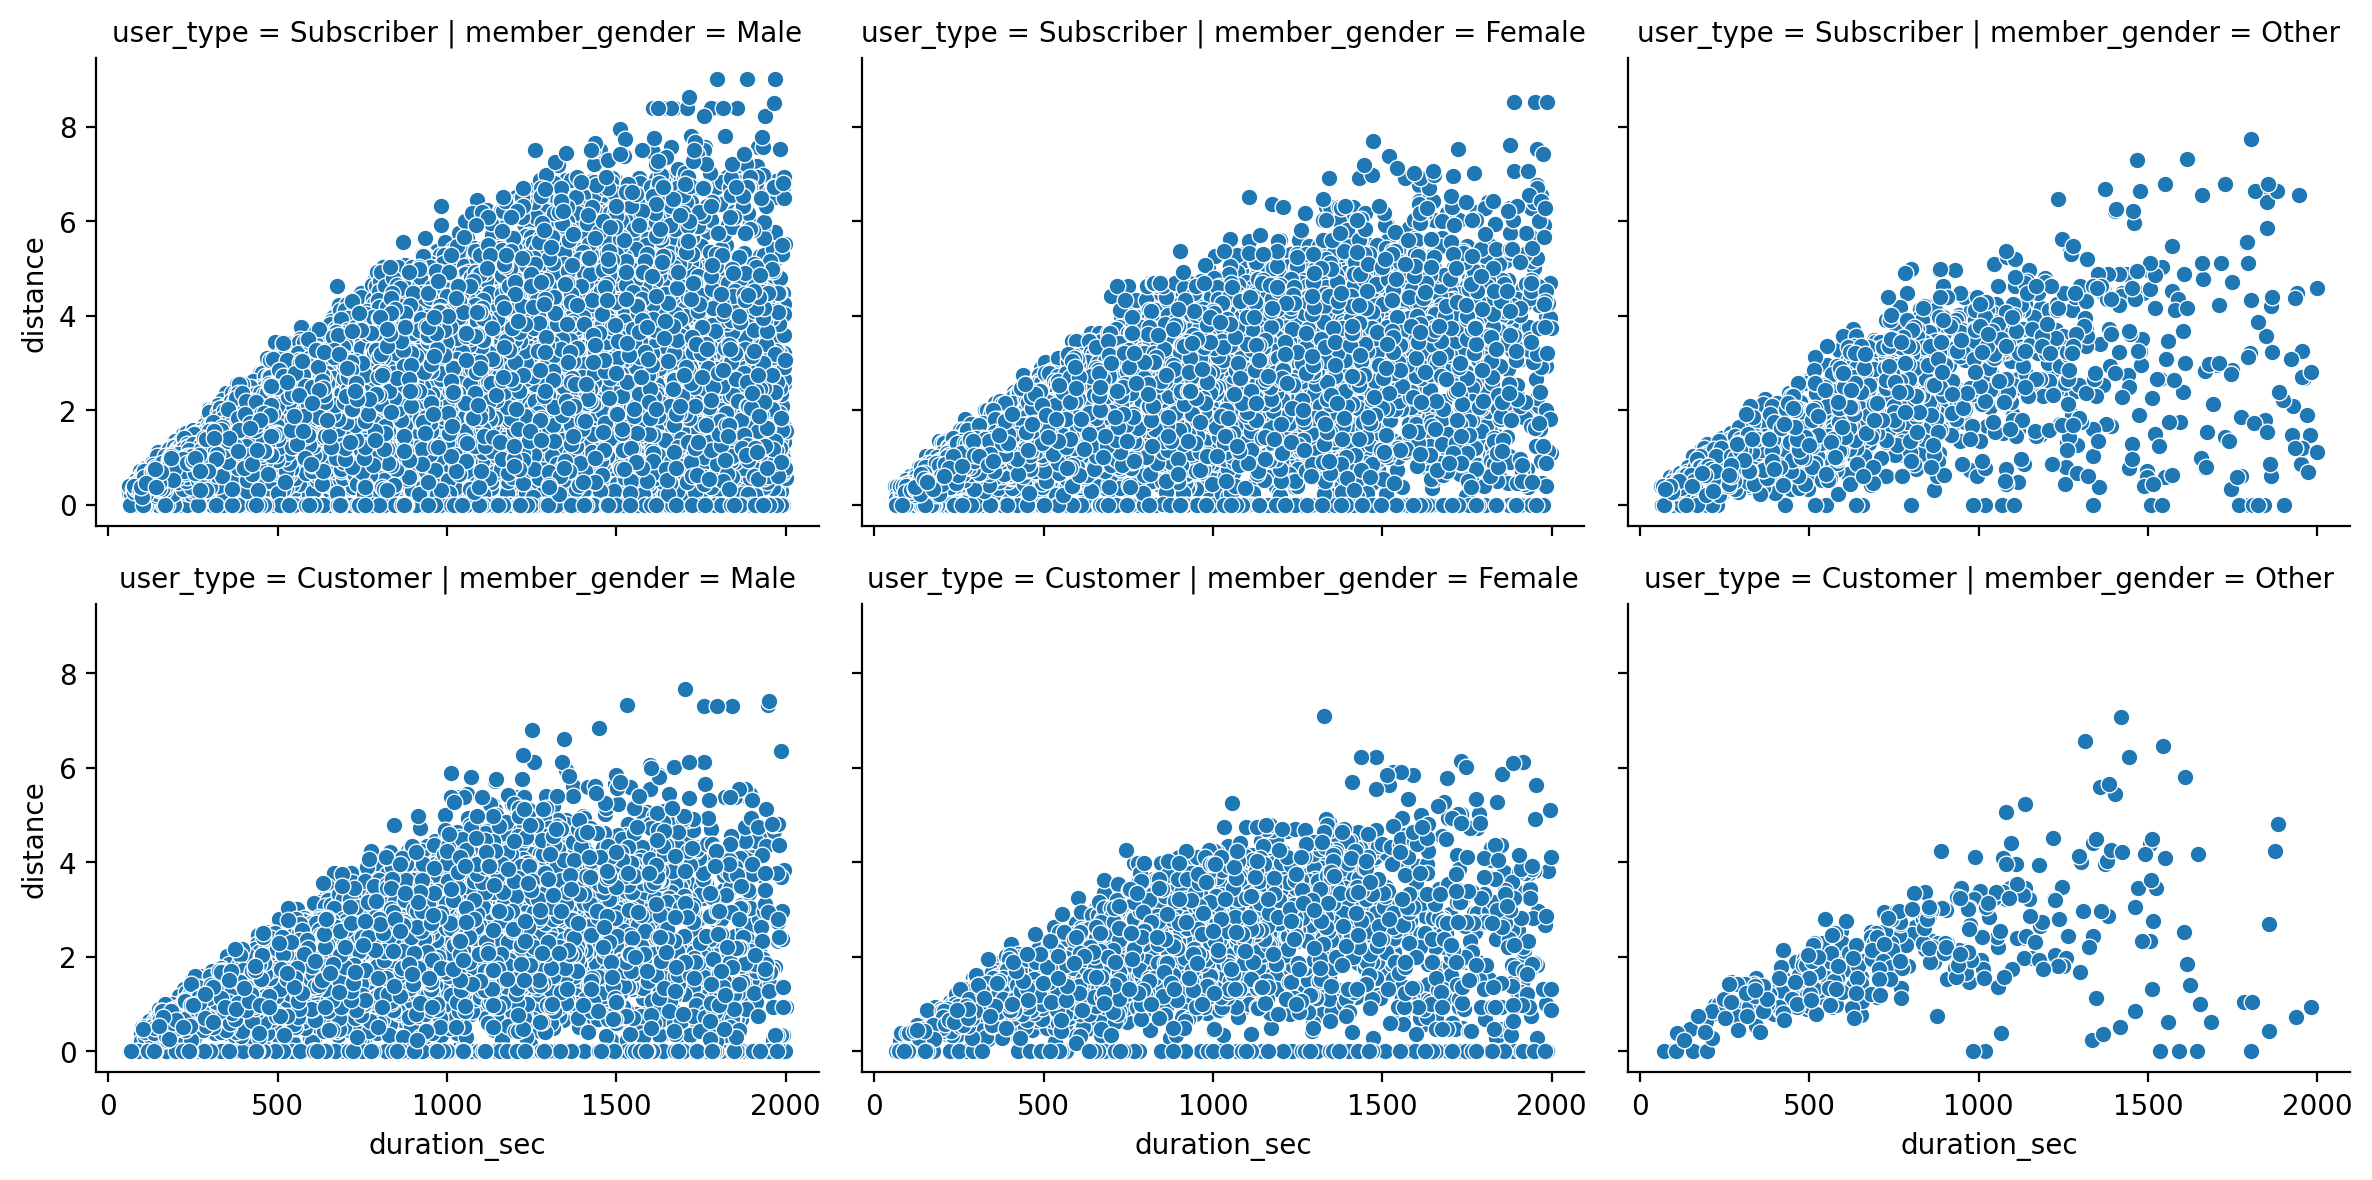

In [62]:
g = sns.FacetGrid(df, col="member_gender", row="user_type", height=3, aspect=1.33);
g.map(sns.scatterplot, "duration_sec", "distance");

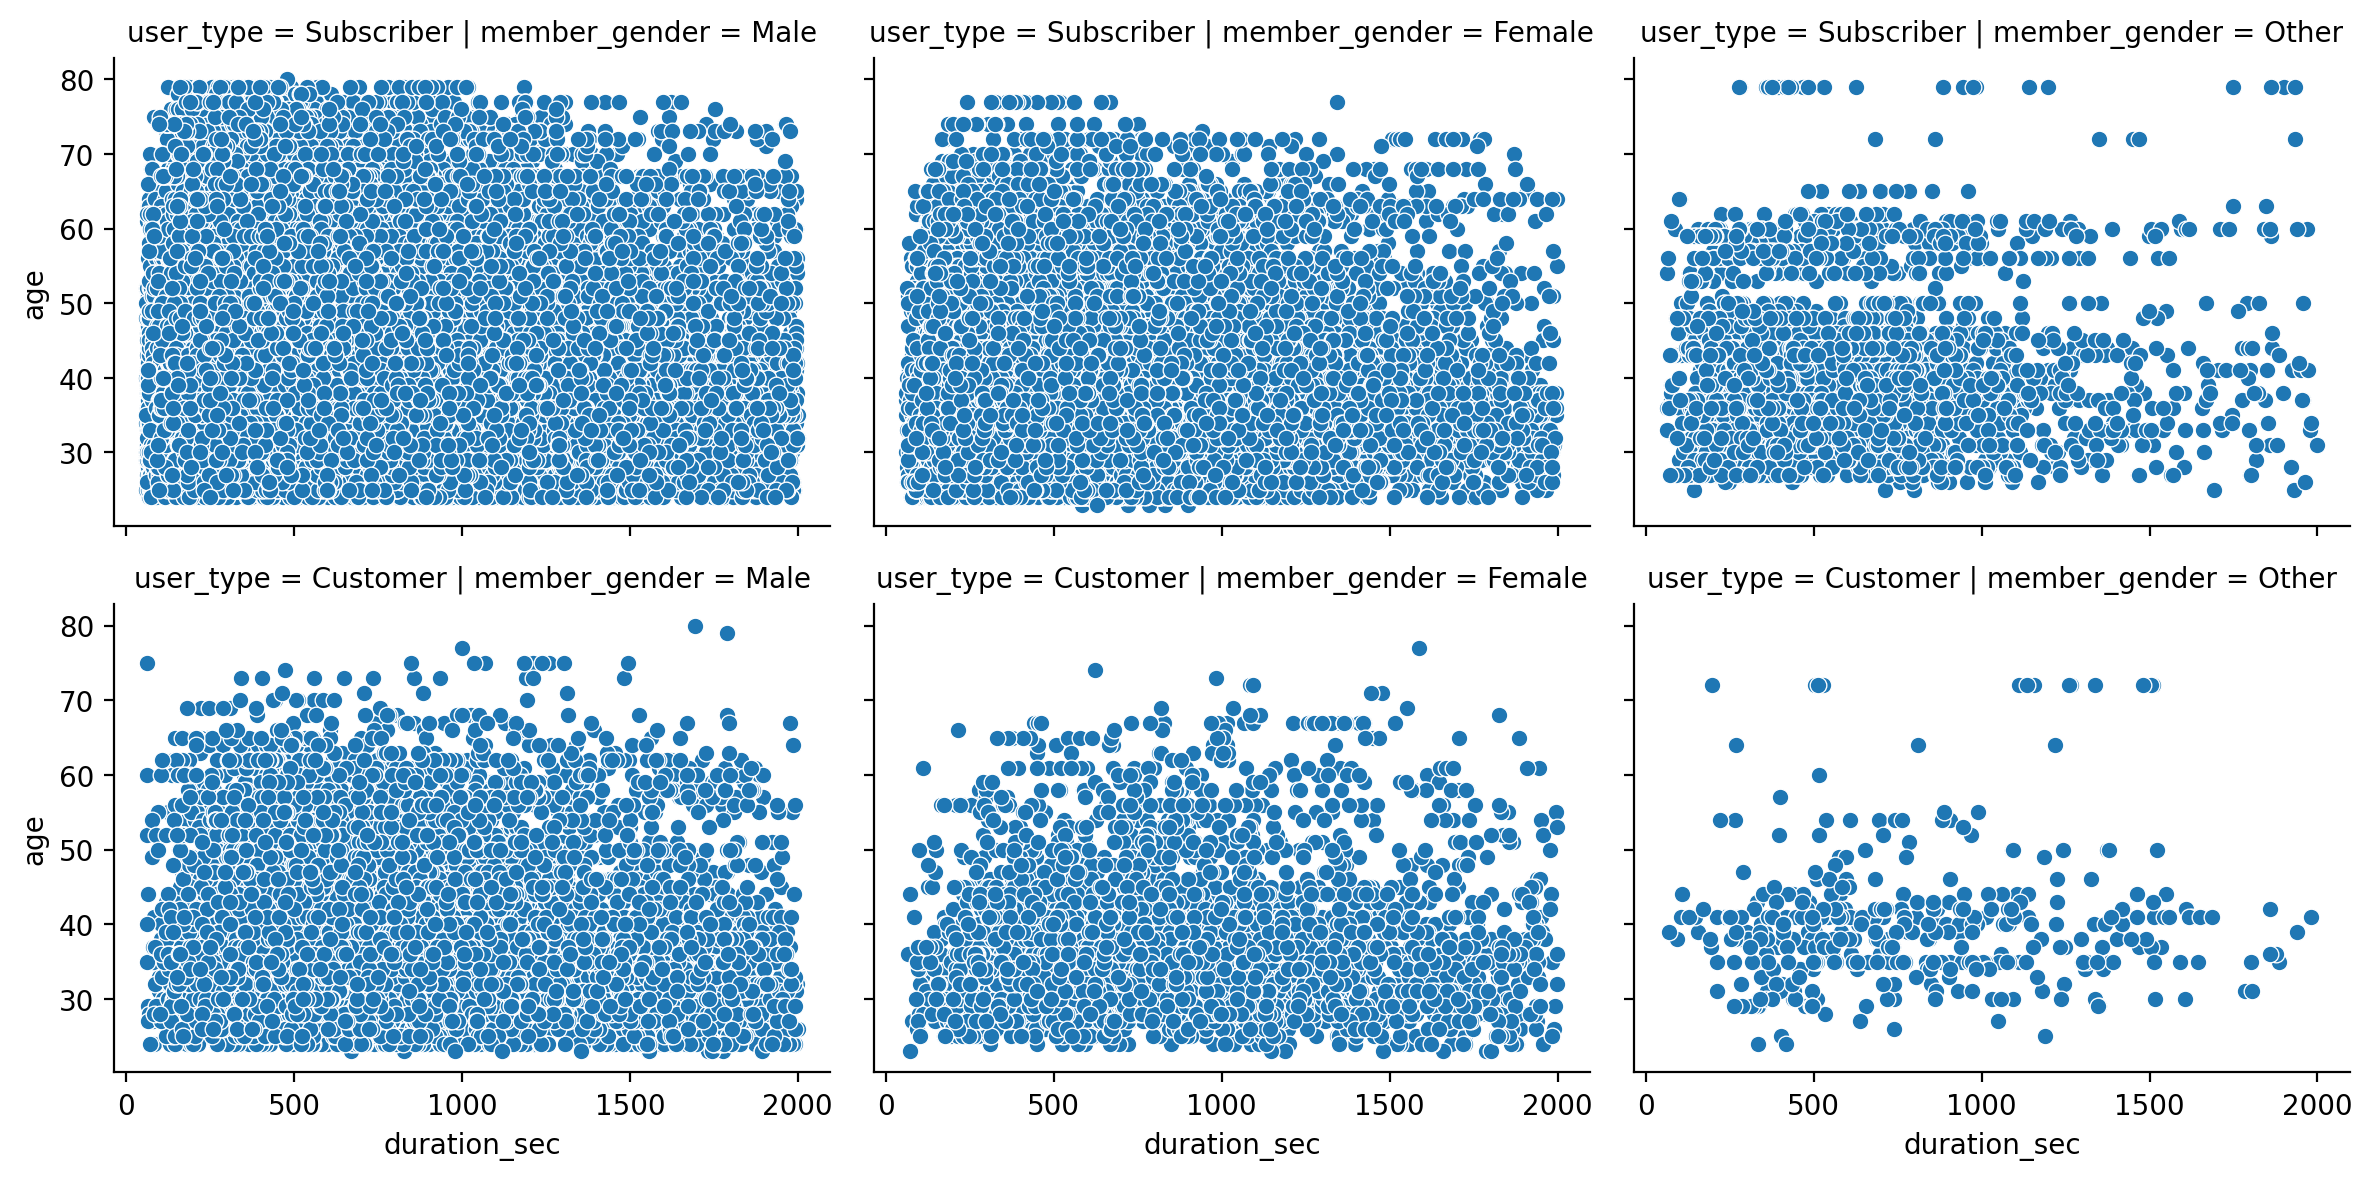

In [63]:
g = sns.FacetGrid(df, col="member_gender", row="user_type", height=3, aspect=1.33);
g.map(sns.scatterplot, "duration_sec", "age");

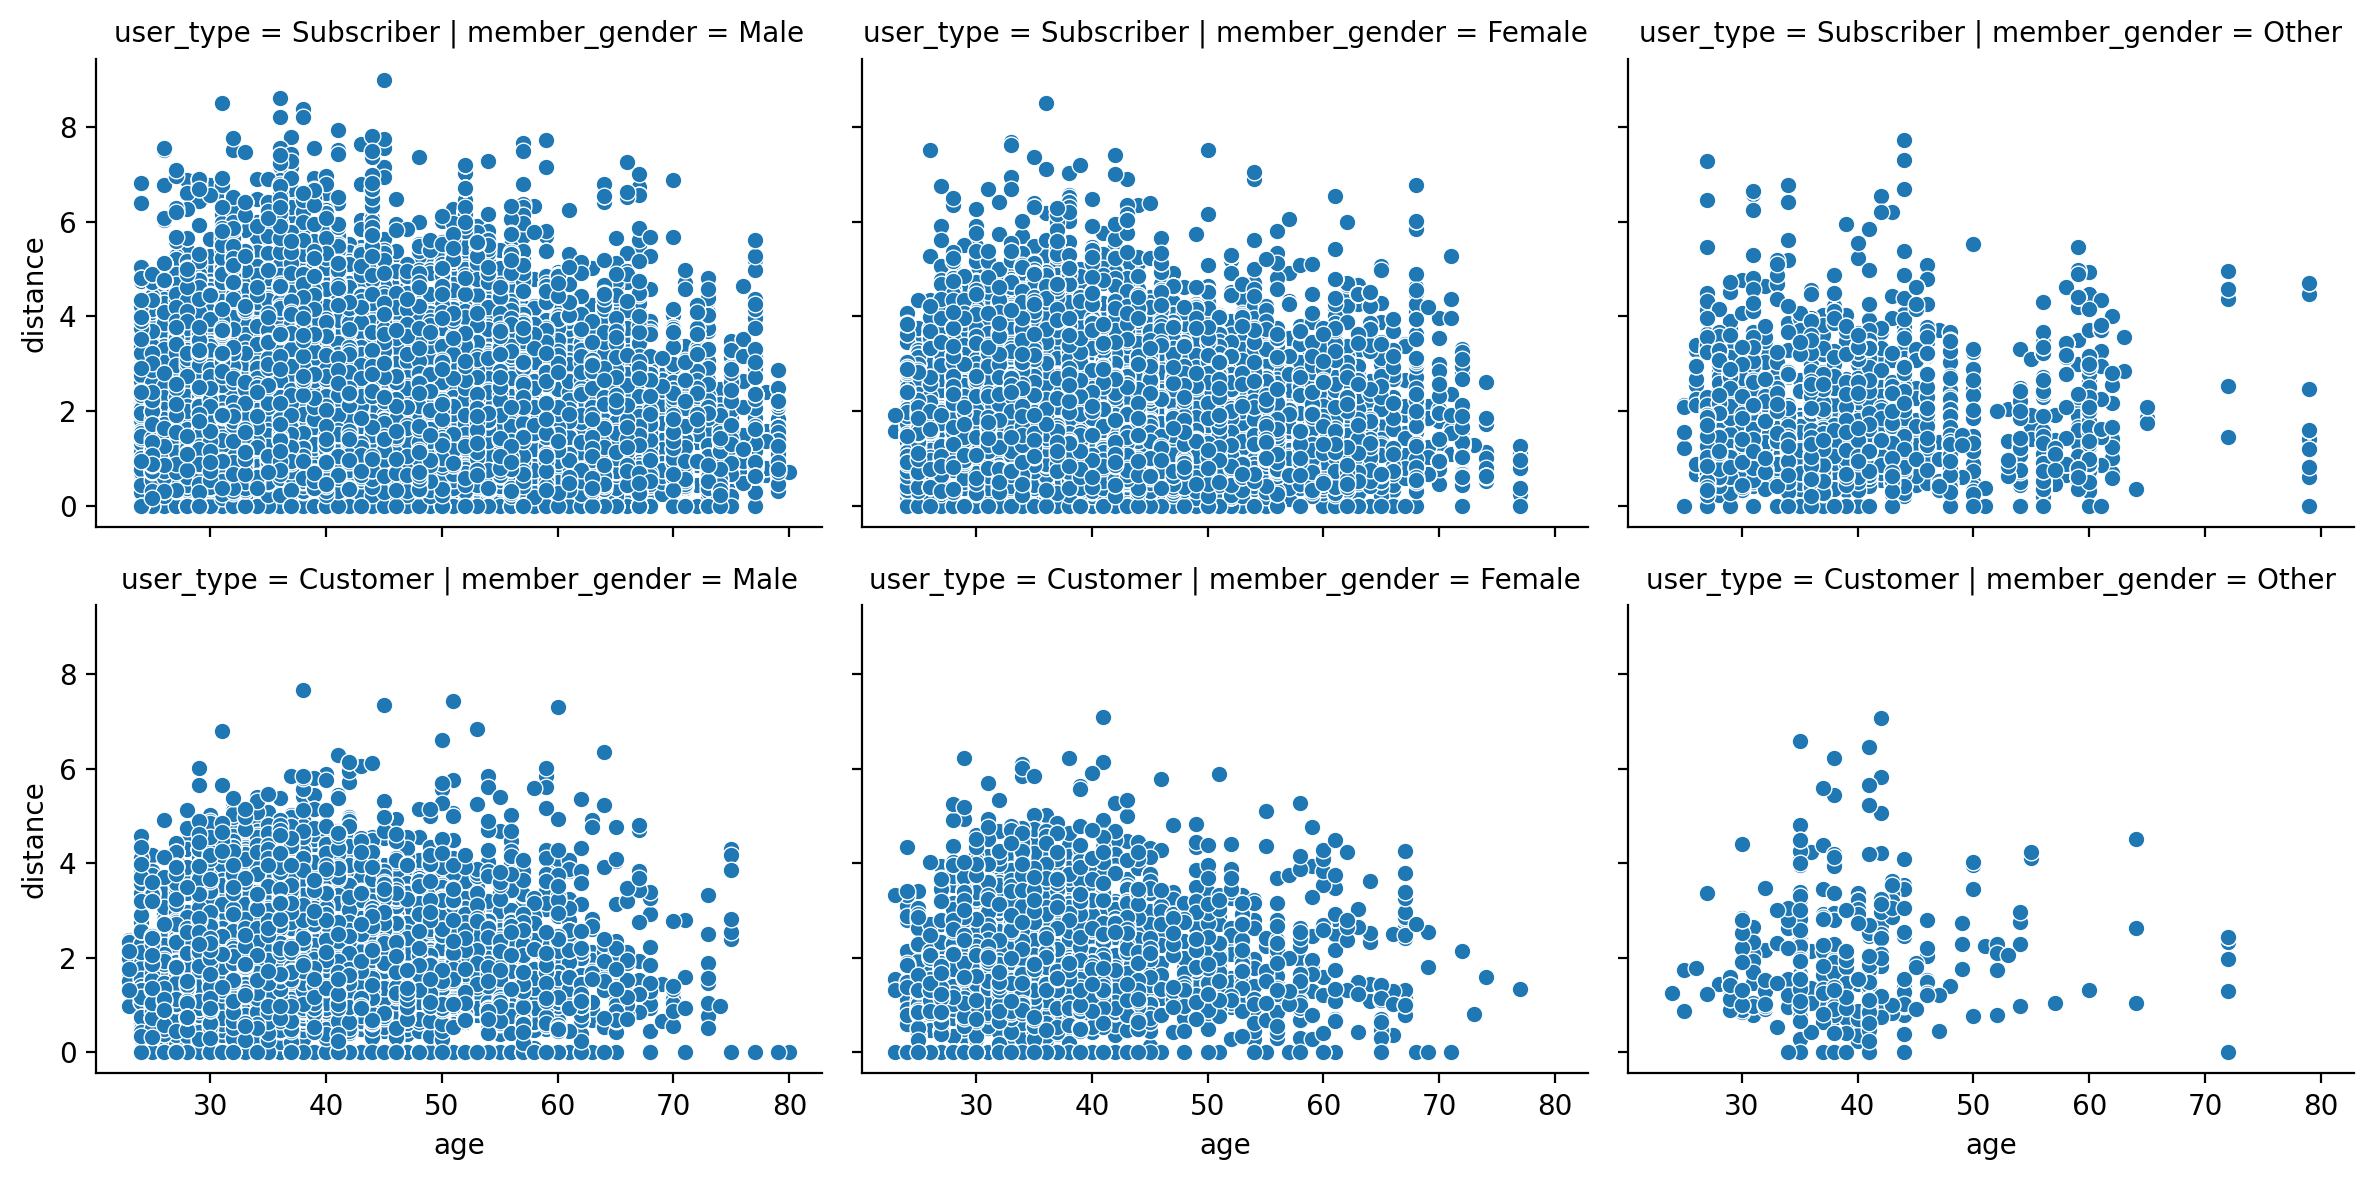

In [64]:
g = sns.FacetGrid(df, col="member_gender", row="user_type", height=3, aspect=1.33);
g.map(sns.scatterplot, "age", "distance");

### Plot Matrix

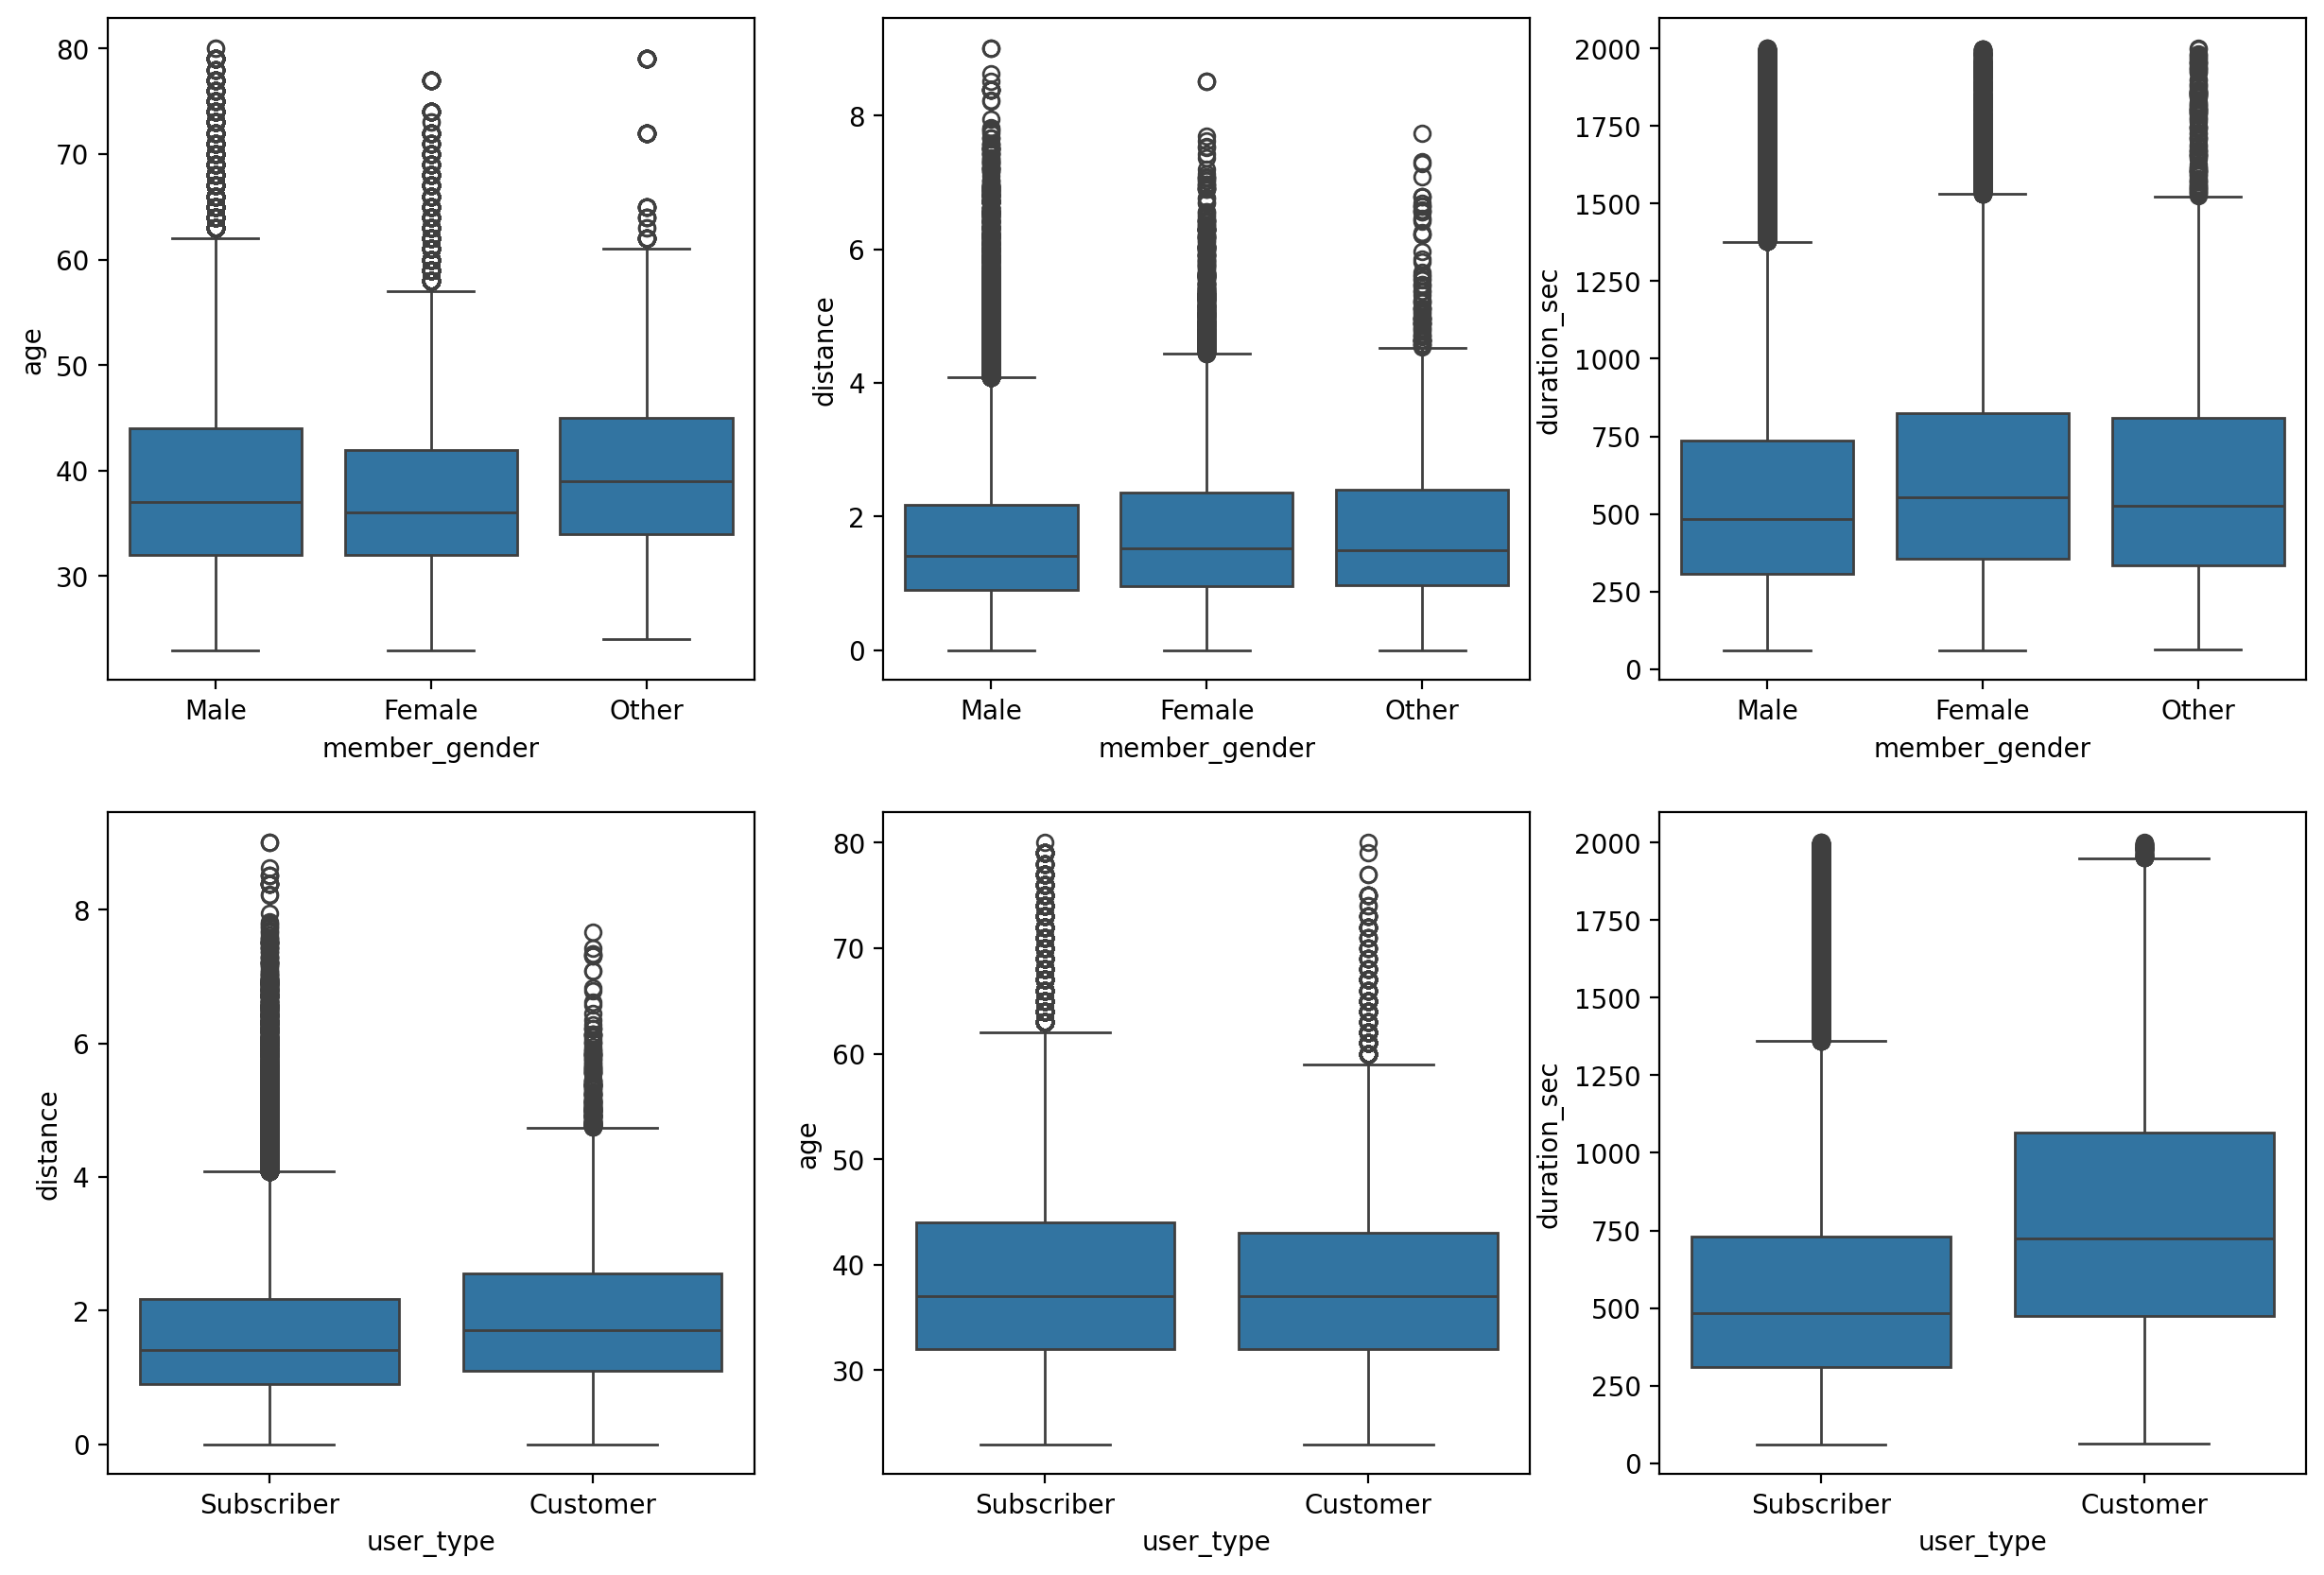

In [65]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.boxplot(df,x='member_gender',y='age');

plt.subplot(2,3,2)
sns.boxplot(df,x='member_gender',y='distance'); 

plt.subplot(2,3,3)
sns.boxplot(df,x='member_gender',y='duration_sec'); 


plt.subplot(2,3,4)
sns.boxplot(df,x='user_type',y='distance'); 

plt.subplot(2,3,5)
sns.boxplot(df,x='user_type',y='age'); 

plt.subplot(2,3,6)
sns.boxplot(df,x='user_type',y='duration_sec'); 

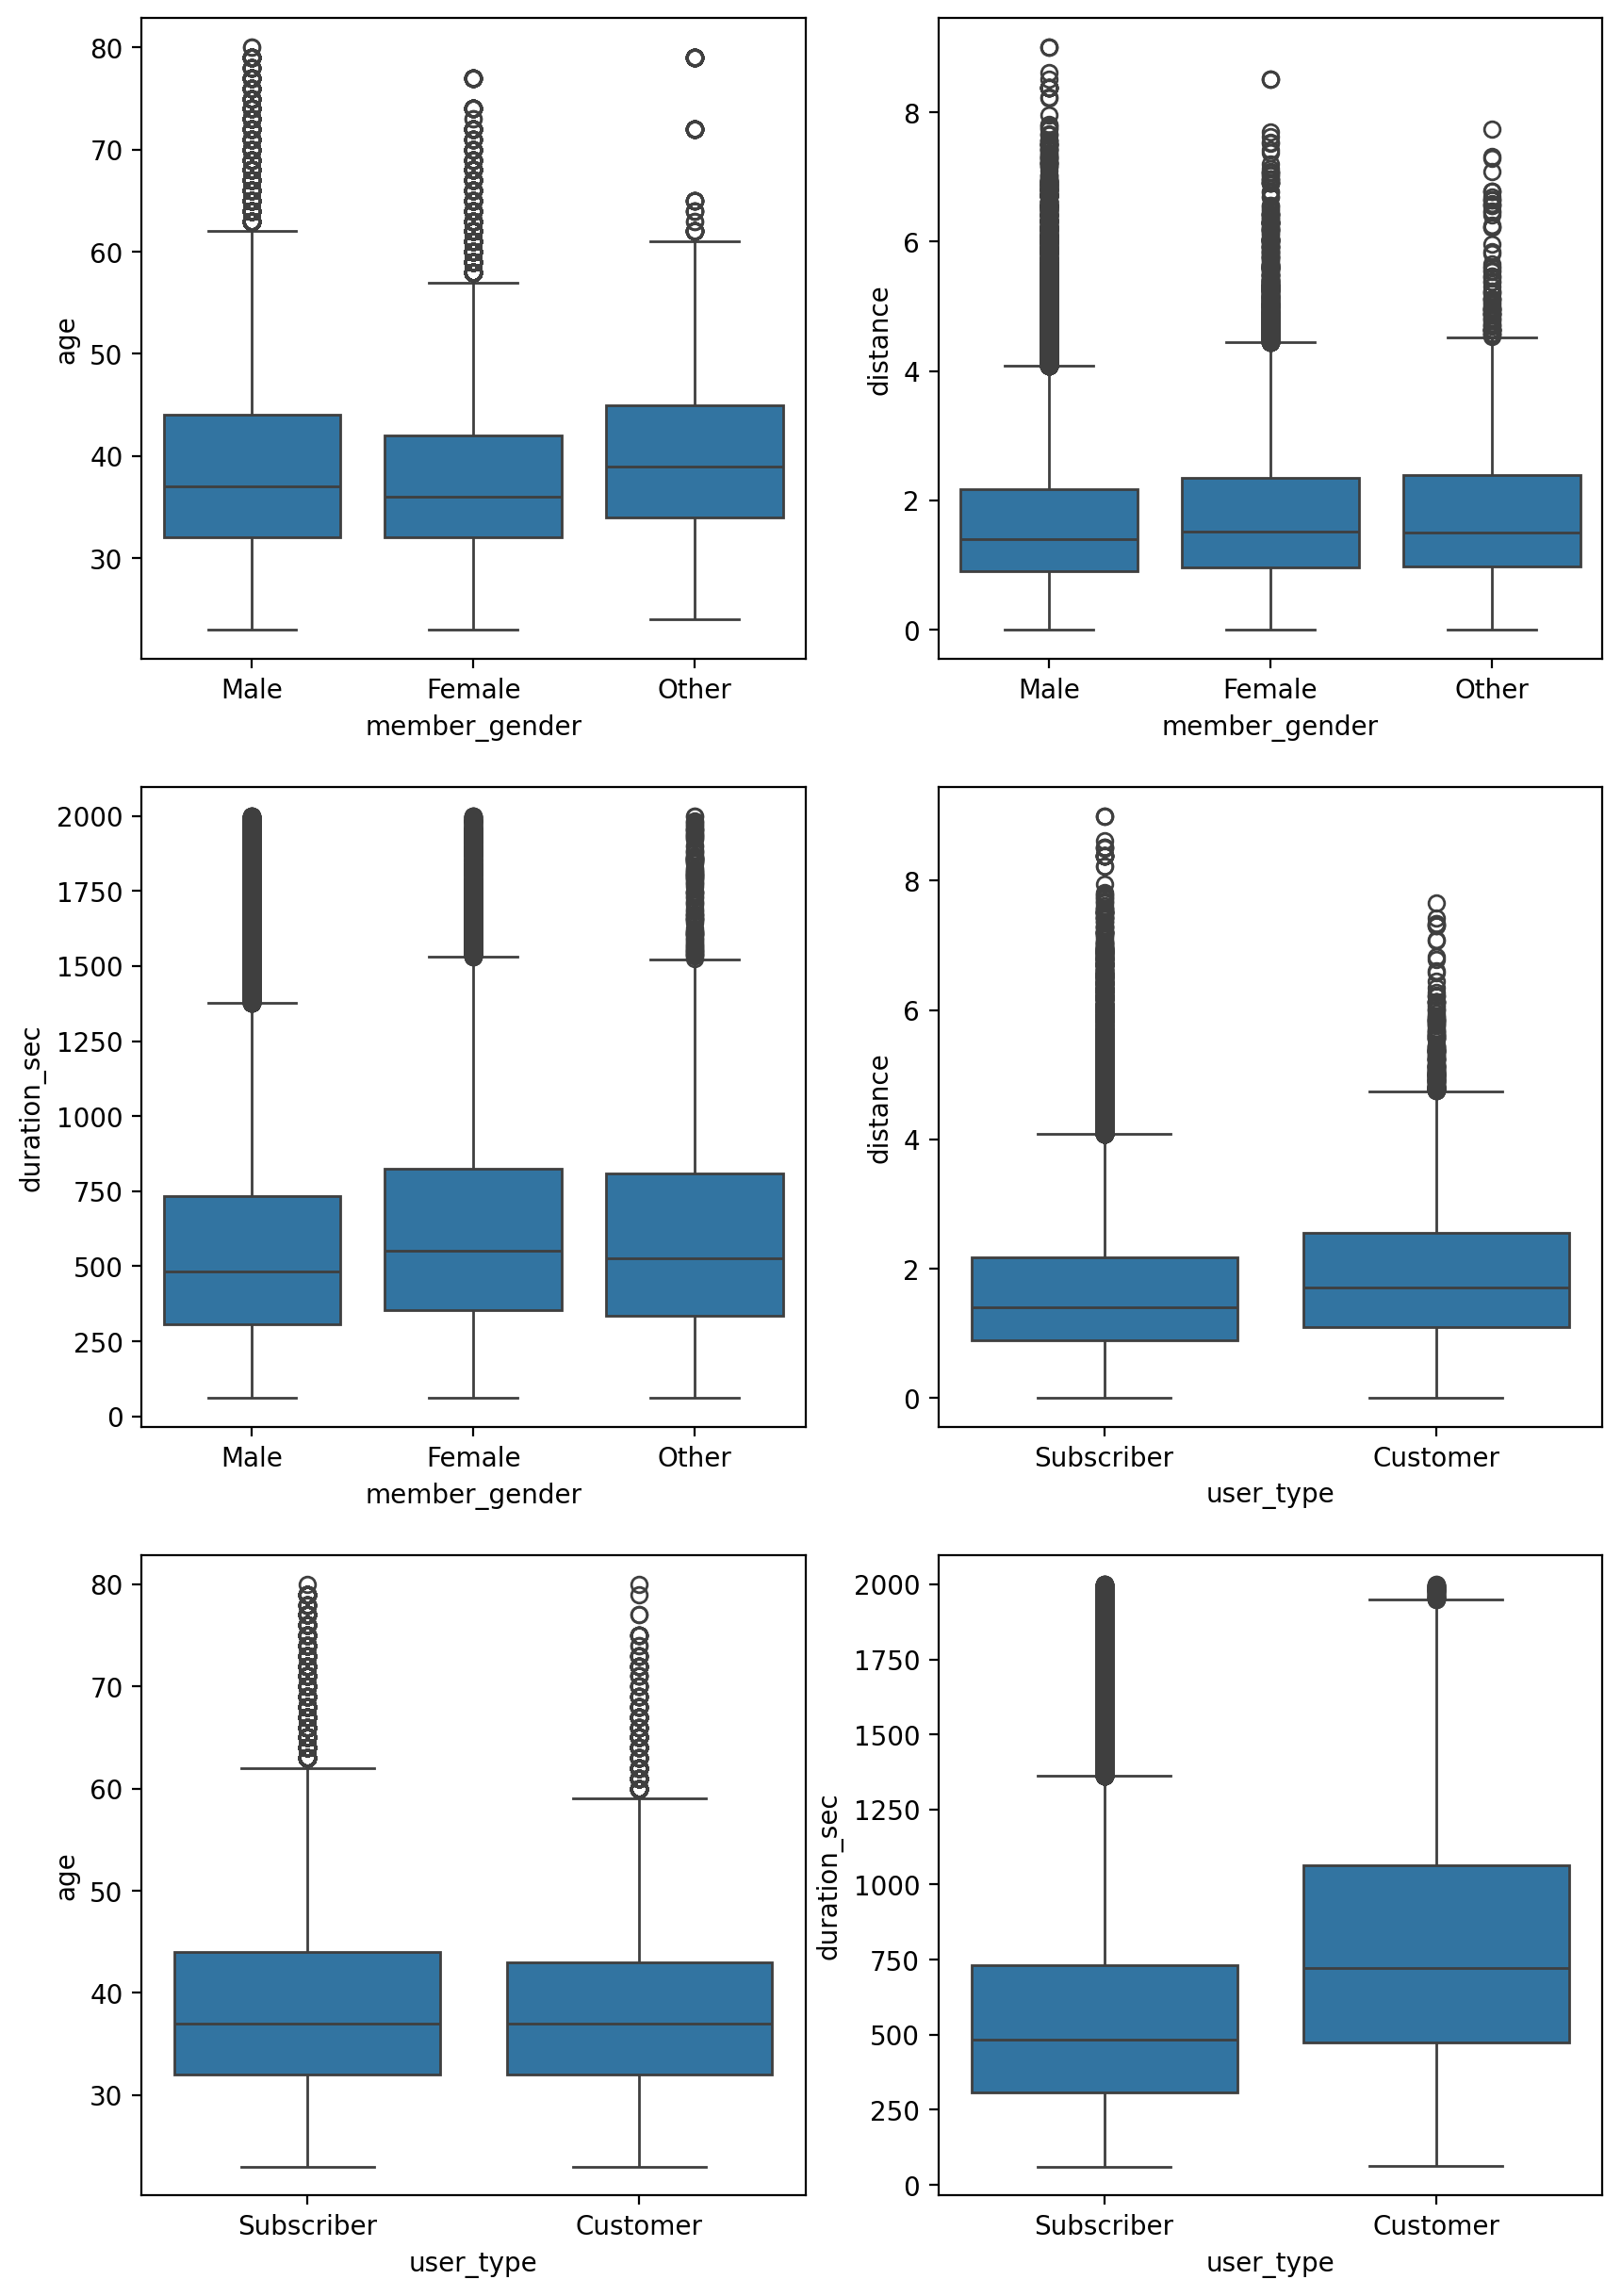

In [66]:
plt.figure(figsize=(10,15))

plt.subplot(3,2,1)
sns.boxplot(df,x='member_gender',y='age');

plt.subplot(3,2,2)
sns.boxplot(df,x='member_gender',y='distance'); 

plt.subplot(3,2,3)
sns.boxplot(df,x='member_gender',y='duration_sec'); 


plt.subplot(3,2,4)
sns.boxplot(df,x='user_type',y='distance'); 

plt.subplot(3,2,5)
sns.boxplot(df,x='user_type',y='age'); 

plt.subplot(3,2,6)
sns.boxplot(df,x='user_type',y='duration_sec'); 

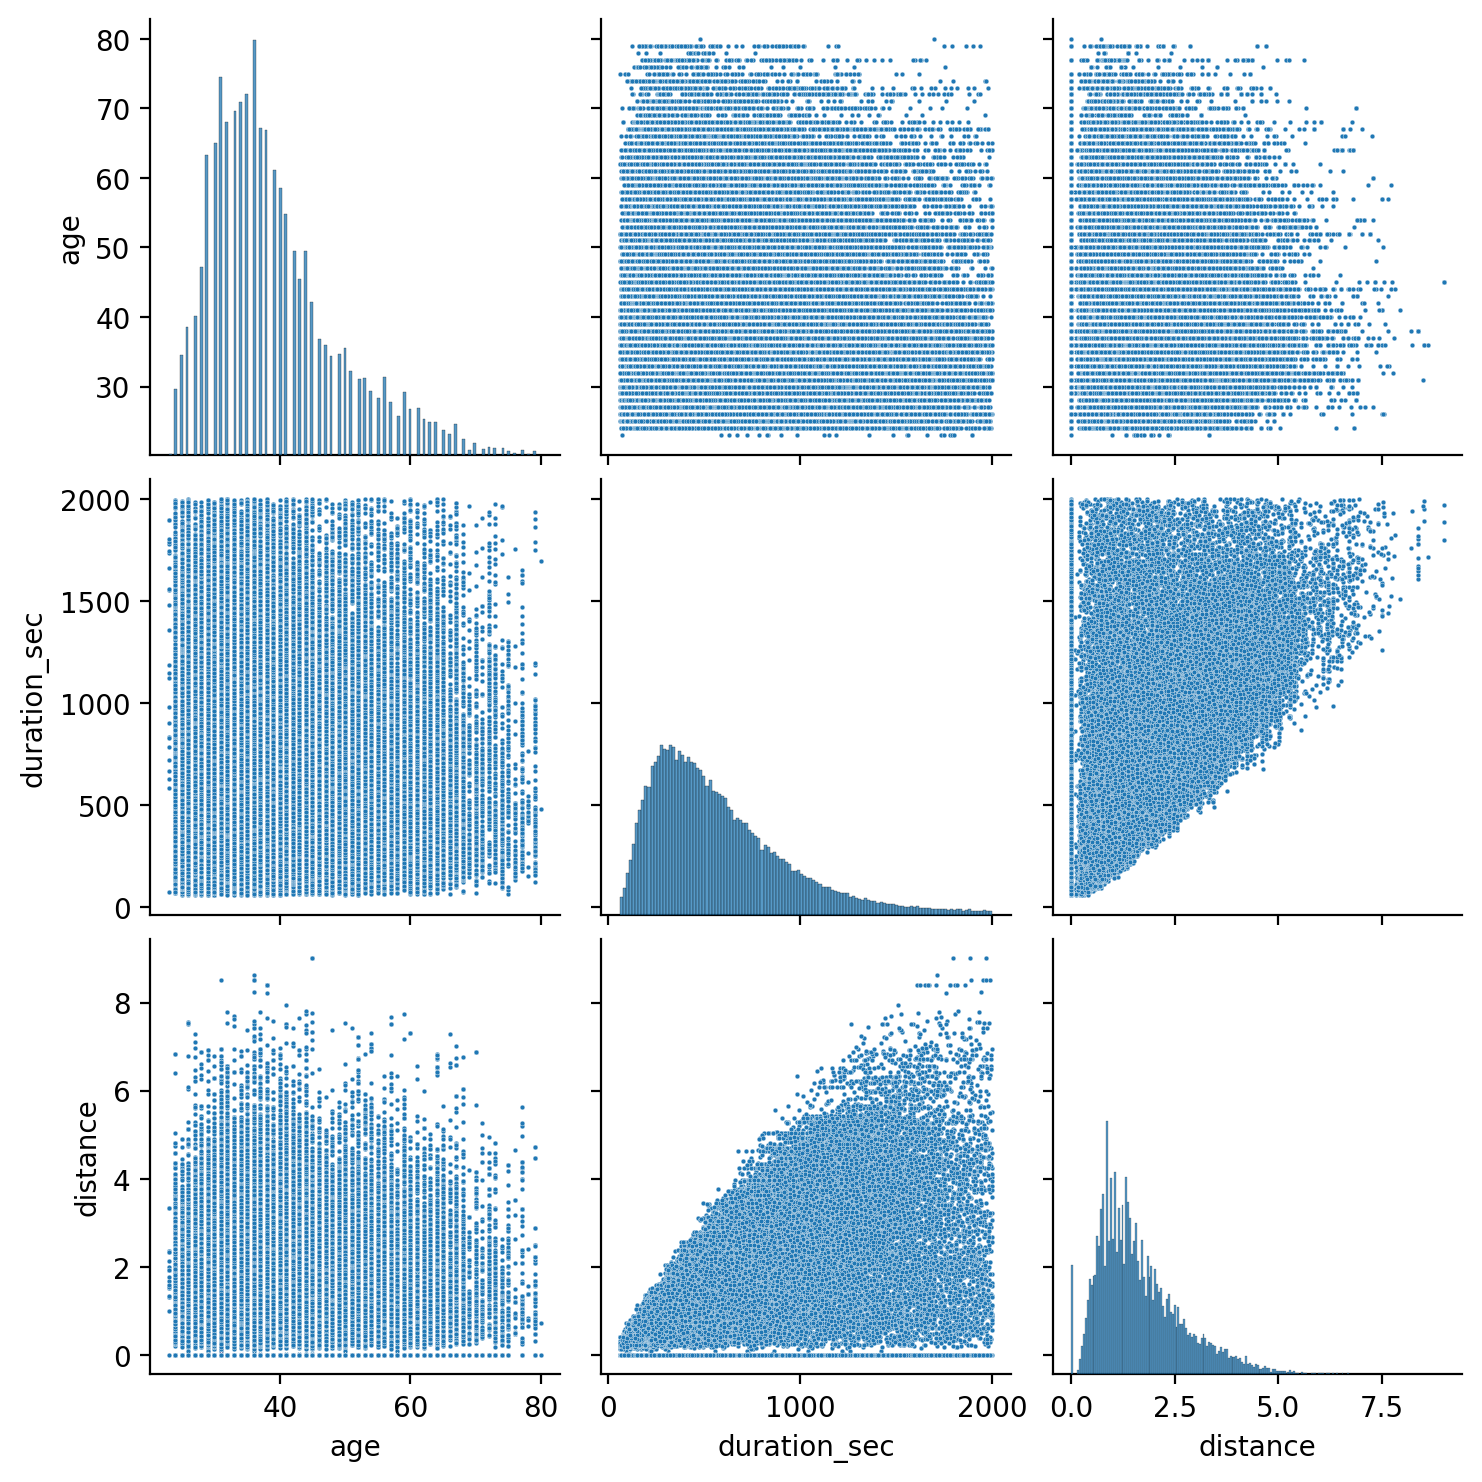

In [67]:
sns.pairplot(df, x_vars=['age','duration_sec','distance'], y_vars=['age','duration_sec','distance'] ,diag_kind='hist',plot_kws={"s": 3});

### Grouped bar plots with three variables

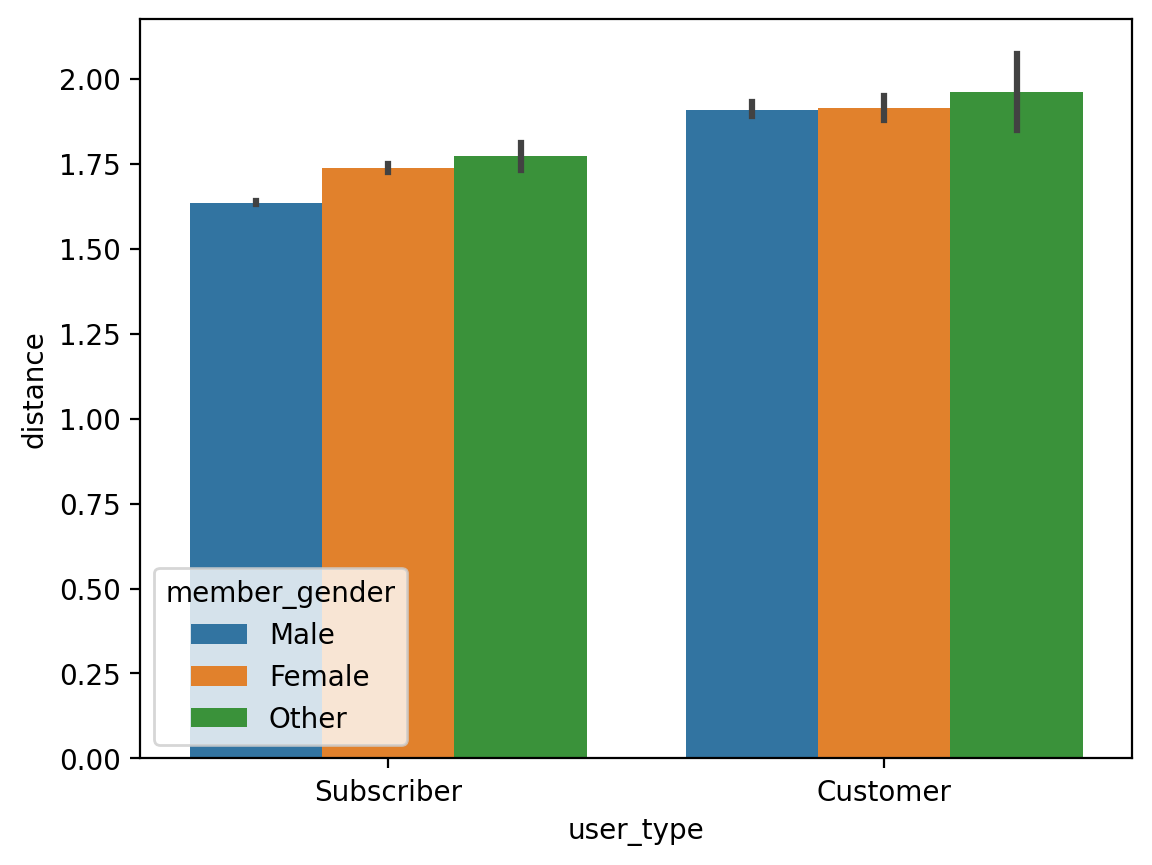

In [68]:
sns.barplot(df, x='user_type',y='distance',hue='member_gender');

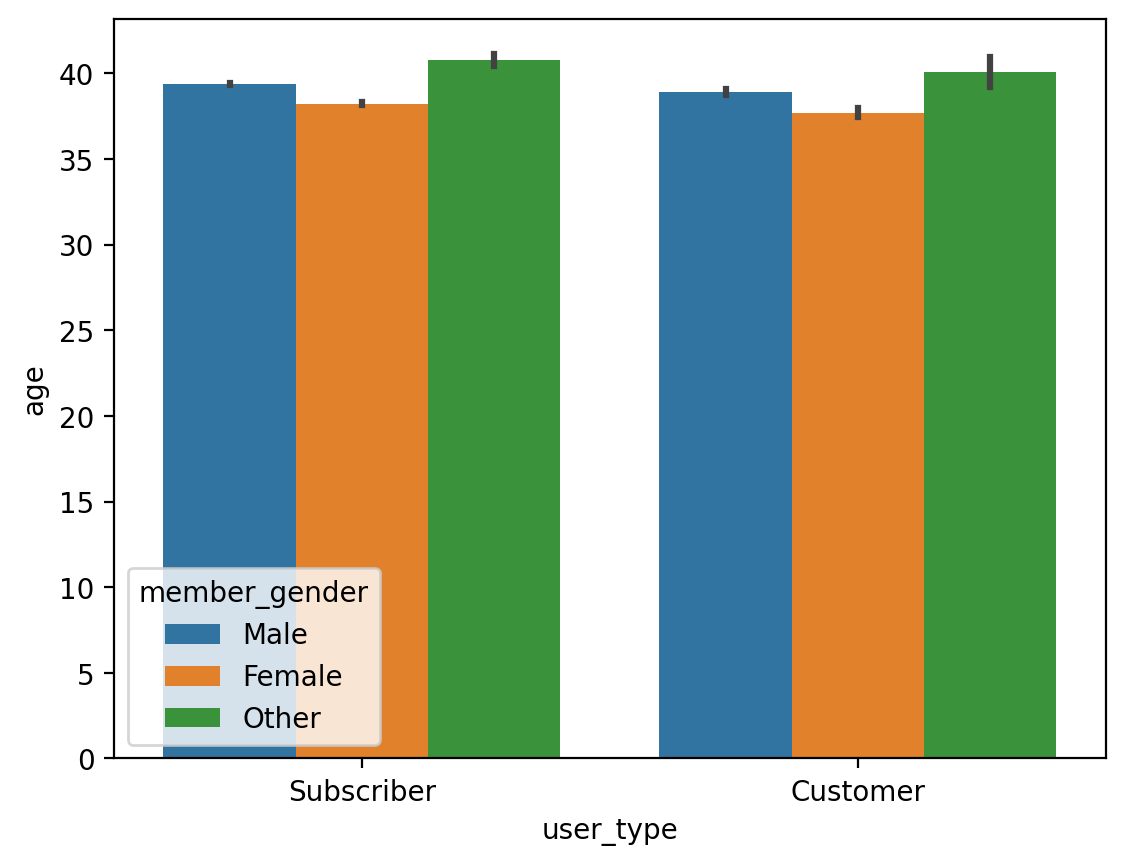

In [69]:
sns.barplot(df, x='user_type',y='age',hue='member_gender');

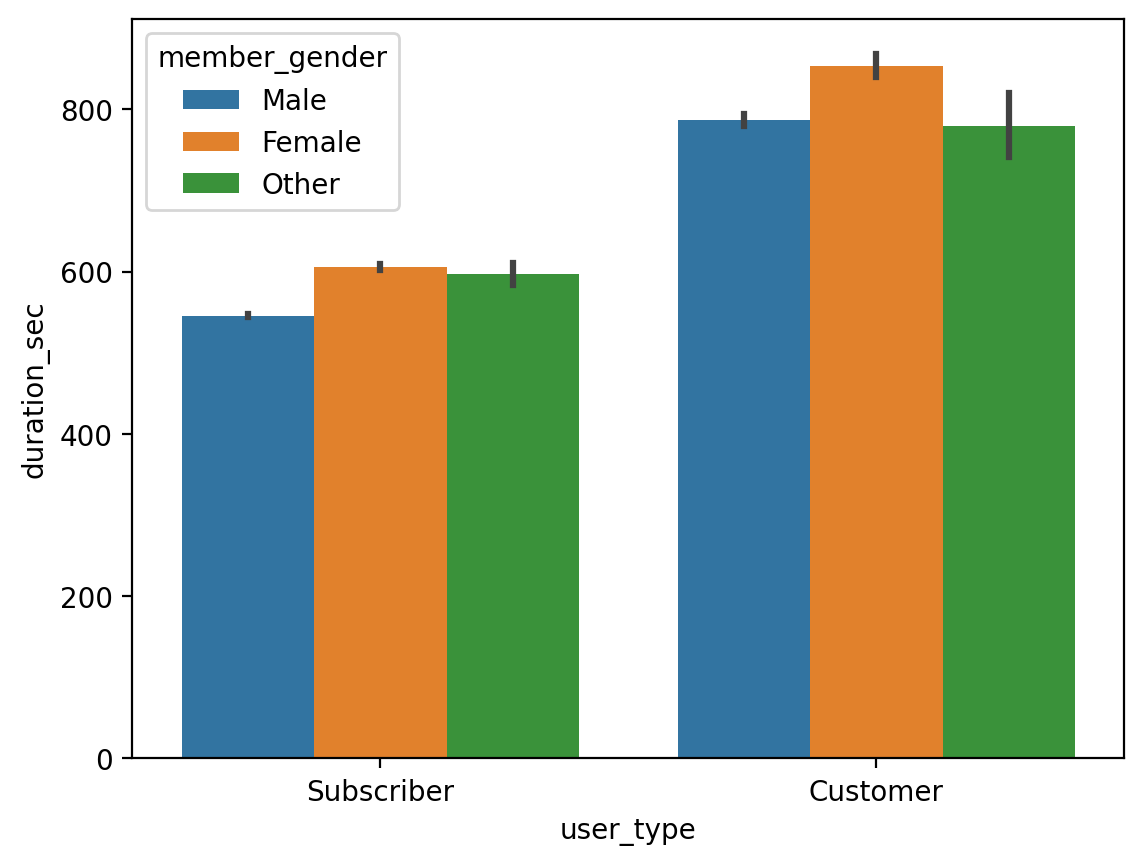

In [70]:
sns.barplot(df, x='user_type',y='duration_sec',hue='member_gender');

### Scatter Plot with Multiple Encodings

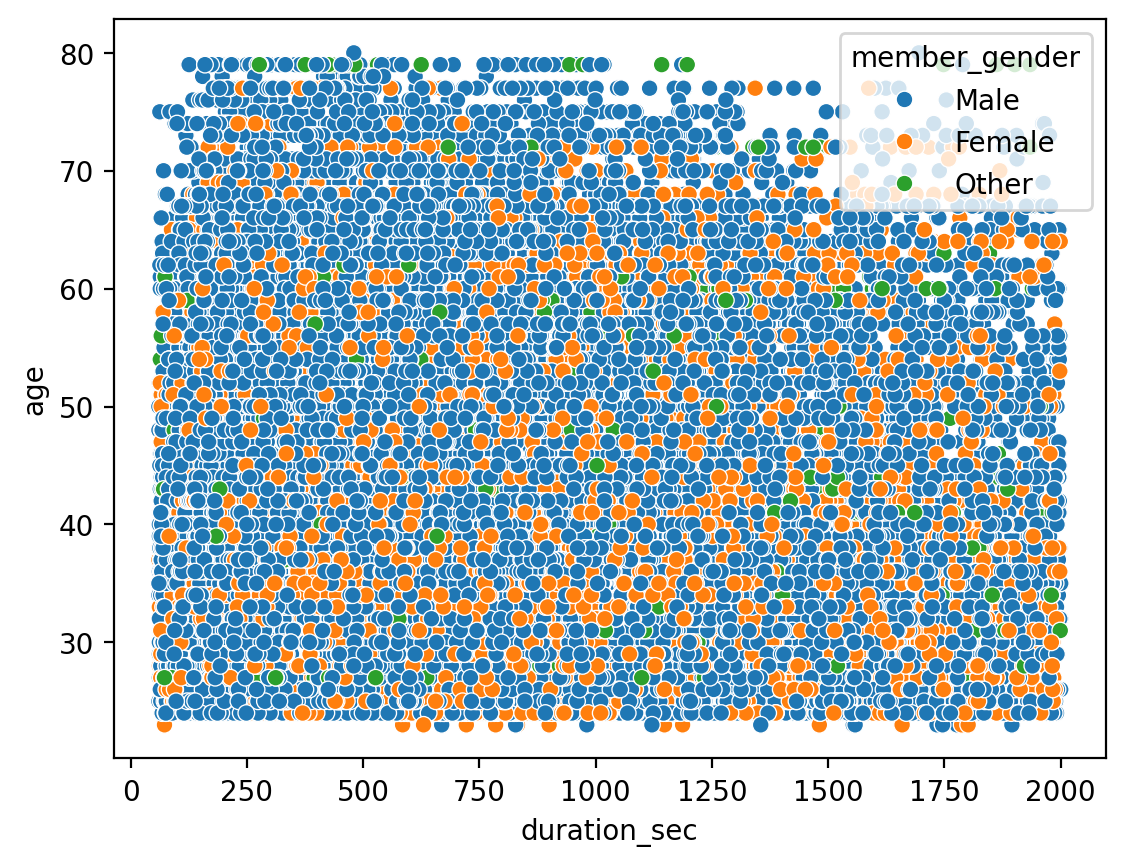

In [71]:
sns.scatterplot(df, x='duration_sec', y='age',hue="member_gender");

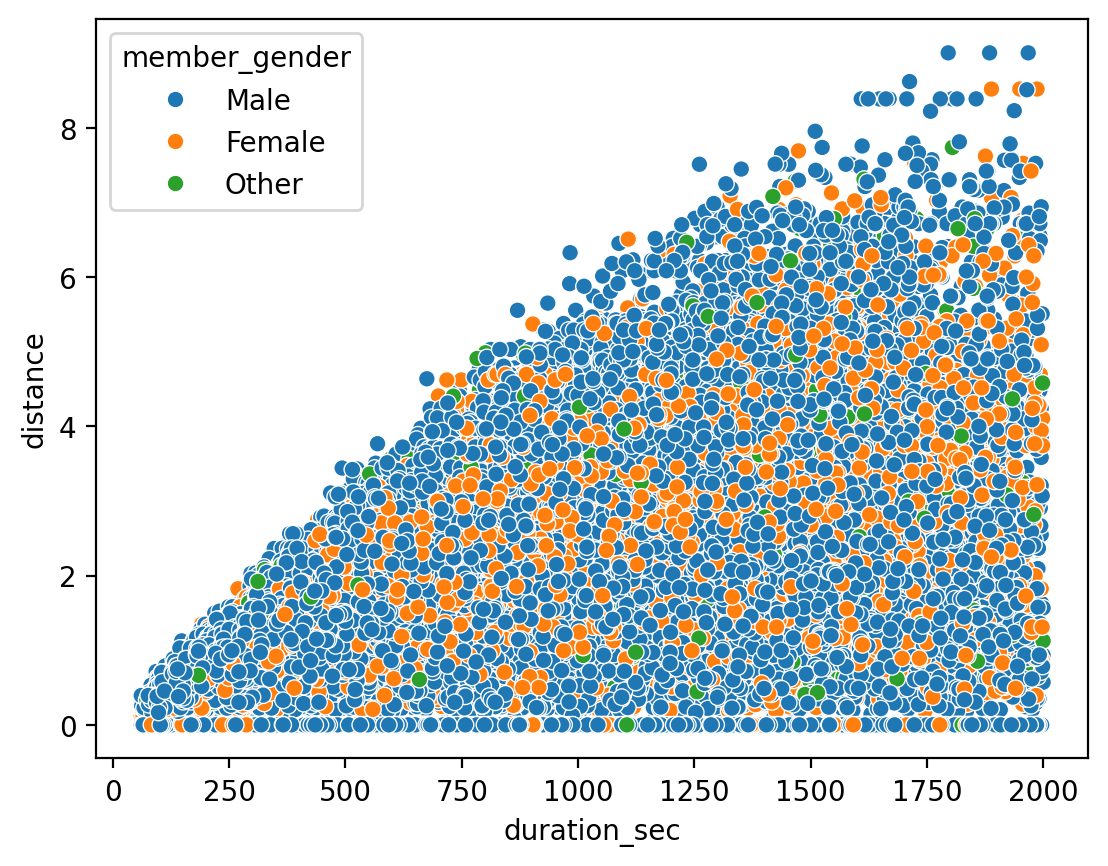

In [72]:
sns.scatterplot(df, x='duration_sec', y='distance',hue="member_gender");

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Most features tended to follow trends already established in bivariate and univariate analyses. The user_type, gender, duration_sec grouped bar chart showed customers tended to rent out bikes the longest, and of those customers females rented bikes the longest. The multiple encoded scatter plots showed gender did not affect or have a trend in previously established bivariate analyses.

### Were there any interesting or surprising interactions between features?

Nope.

## Conclusions

Two columns were added to the dataset, the `age` column calculated by subtracting the current year by birth year and the `distance` formula

It was found that there were more male renters as there were other renters, yet female renters tended to rent bikes for longer than others. Distances travelled tended to be less than 4 km. The age did not have any correlation with distance nor the duration. But, there was a direct relationship between distance and duration where the more distance a bike has been ridden for the longer it was rented.

## Exporting Cleaned Dataset

In [73]:
df.to_csv('cleaned.csv')